# **Business problem understanding** 
## **Business context**
Olist is a Brazilian e-commerce startup founded in 2015 and launched in 2016, enabling small and medium-sized businesses to sell their products across multiple marketplaces through a single platform. By providing logistics support, marketing tools, and payment services, Olist helps sellers in their operations and expand their reach.

In 2018, Brazil had a population of approximately 210 million, with over 150 million people having internet access, and around 60% of them had made online purchases. The e-commerce market was experiencing rapid growth, with transactions estimated at $24 billion. However, with increasing competition, customer retention became a key challenge. Studies indicate that acquiring a new customer can cost five times more than retaining an existing one, while improving customer retention by just 5% can boost a company's profit by 25% to 95%. Moreover, existing customers have a 60% to 70% chance of making a repeat purchase, compared to just 5% to 20% for new customers.

Recognizing these challenges, Olist initially focused on aggressive customer acquisition, investing heavily in marketing. However, as the company matured, it shifted its strategy toward customer retention to maximize lifetime value (LTV) and improve long-term profitability. Data-driven insights play a crucial role in this shift, helping Olist identify at-risk customers and implement targeted marketing strategies. Since re-engaging existing customers can be 40% more cost-effective than acquiring new ones, this approach not only optimizes marketing spend but also strengthens Olist’s position in Brazil’s competitive e-commerce landscape.


## **Problem statement**
Since its establishment in 2015, Olist has experienced significant growth, but like any other e-commerce platform, it faces the ongoing challenge of customer churn. Studies indicate that the average annual churn rate in e-commerce ranges between 20% and 25%, meaning that without proper retention strategies, a substantial number of customers may disengage, leading to significant revenue loss over time.

While Olist has successfully acquired more than ninety thousand customers through substantial marketing investments—spending ~$104 per customer—initial data shows that only 15–20% of these customers make a repeat purchase. This highlights a high churn risk, potentially exceeding 30%, making retention efforts crucial for long-term profitability.

To address this, Olist allocates a marketing budget for customer retention. However, not all customers have an equal risk of churning, and a one-size-fits-all approach can be inefficient and costly. Instead, a data-driven strategy allows for more targeted and effective retention efforts. By identifying at-risk customers based on their behavior and characteristics, Olist can implement personalized interventions, such as:

- Personalized promotions and targeted discounts to re-engage customers.
- Tailored product recommendations to encourage repeat purchases.
- Improved customer service and engagement strategies to enhance satisfaction and loyalty.

Additionally, optimizing marketing spend by focusing retargeting efforts on high-risk customers can significantly reduce costs and increase campaign effectiveness. Olist aims to boost repeat orders by at least 20%, ensuring that acquired customers become long-term, high-value users. By developing predictive analytics and strategic customer engagement, Olist can drive higher retention rates, lower marketing expenses, and ultimately, stronger revenue growth in the competitive e-commerce landscape.


## **Goals**
To address the challenge of customer churn, this study aims to develop a machine learning model capable of predicting the likelihood of churn based on historical transaction data. By analyzing key customer behaviors—such as purchase patterns, transaction frequency, order value, and time since last purchase—the model will uncover the primary factors contributing to churn.

With these insights, Olist can implement targeted retention strategies to engage at-risk customers and enhance customer lifetime value (LTV). The key objectives of this study include:

1. **Customer Behavior Analysis**:
    - Identifying patterns in purchase frequency, spending habits, and inactivity periods.
    - Determining critical factors influencing customer churn.

2. **Churn Prediction Model Development**:
    - Building a high-accuracy classification model to detect high-risk customers.
    - Setting a target to reduce churn from the existing baseline.

3. **Marketing Cost Optimization**:
    - Directing retargeting efforts toward at-risk segments to maximize efficiency.
    - Reducing marketing costs per active customer by up to 30%, compared to new customer acquisition costs.

4. **Actionable Insights for Retention Strategies**:
    - Providing data-driven recommendations for personalized campaigns.
    - Enhancing engagement strategies to increase repeat purchases and long-term customer retention.


## **Analytic approach**
Churn analysis will be performed in this study and considering that Olist is a relatively new e-commerce, defining churn should not solely based on buying frequency and days of transactions. Based on the fact that the majority of the new customer will only buy once, thus, the most relevant approach is by segmenting customer into 3 groups, new customer, one-time buyer, and repeat buyer. More detial explanation about the conceptualization of churn analysis can be found later in this document. 

The following are the technical approach in this study:
- Data cleaning and preprocessing (translating, merging, drop unused columns, handling duplicate data, drop NaN, change data format, change column name)
- Exploratory Data Analysis (EDA) and data visualization
- Churn analysis
- Data preparation for model machine learning
- Modelling using: 
  - Logistic regression 
  - KNN
  - Decision tree
  - Random forest
  - Ada boost 
  - Gradient boost
  - Extreme gradient boost
- Hyperparameter tuning for the best 2 models from cross-validation
- Modelling using test set predition
  - Before hyperparameter tuning
  - After hyperparameter tuning
- Precision and recall matrix evaluation
- Feature importance
- Conclusion and recommendation

## **Data information**
Source: 
Olist, and André Sionek. (2018). Brazilian E-Commerce Public Dataset by Olist [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/195341

Corresponding link: 
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

The data is provided by Olist from year 2016 - 2018 with more than 100k orders information. The data is divided into multiple files in which its connection is shown in the schema below


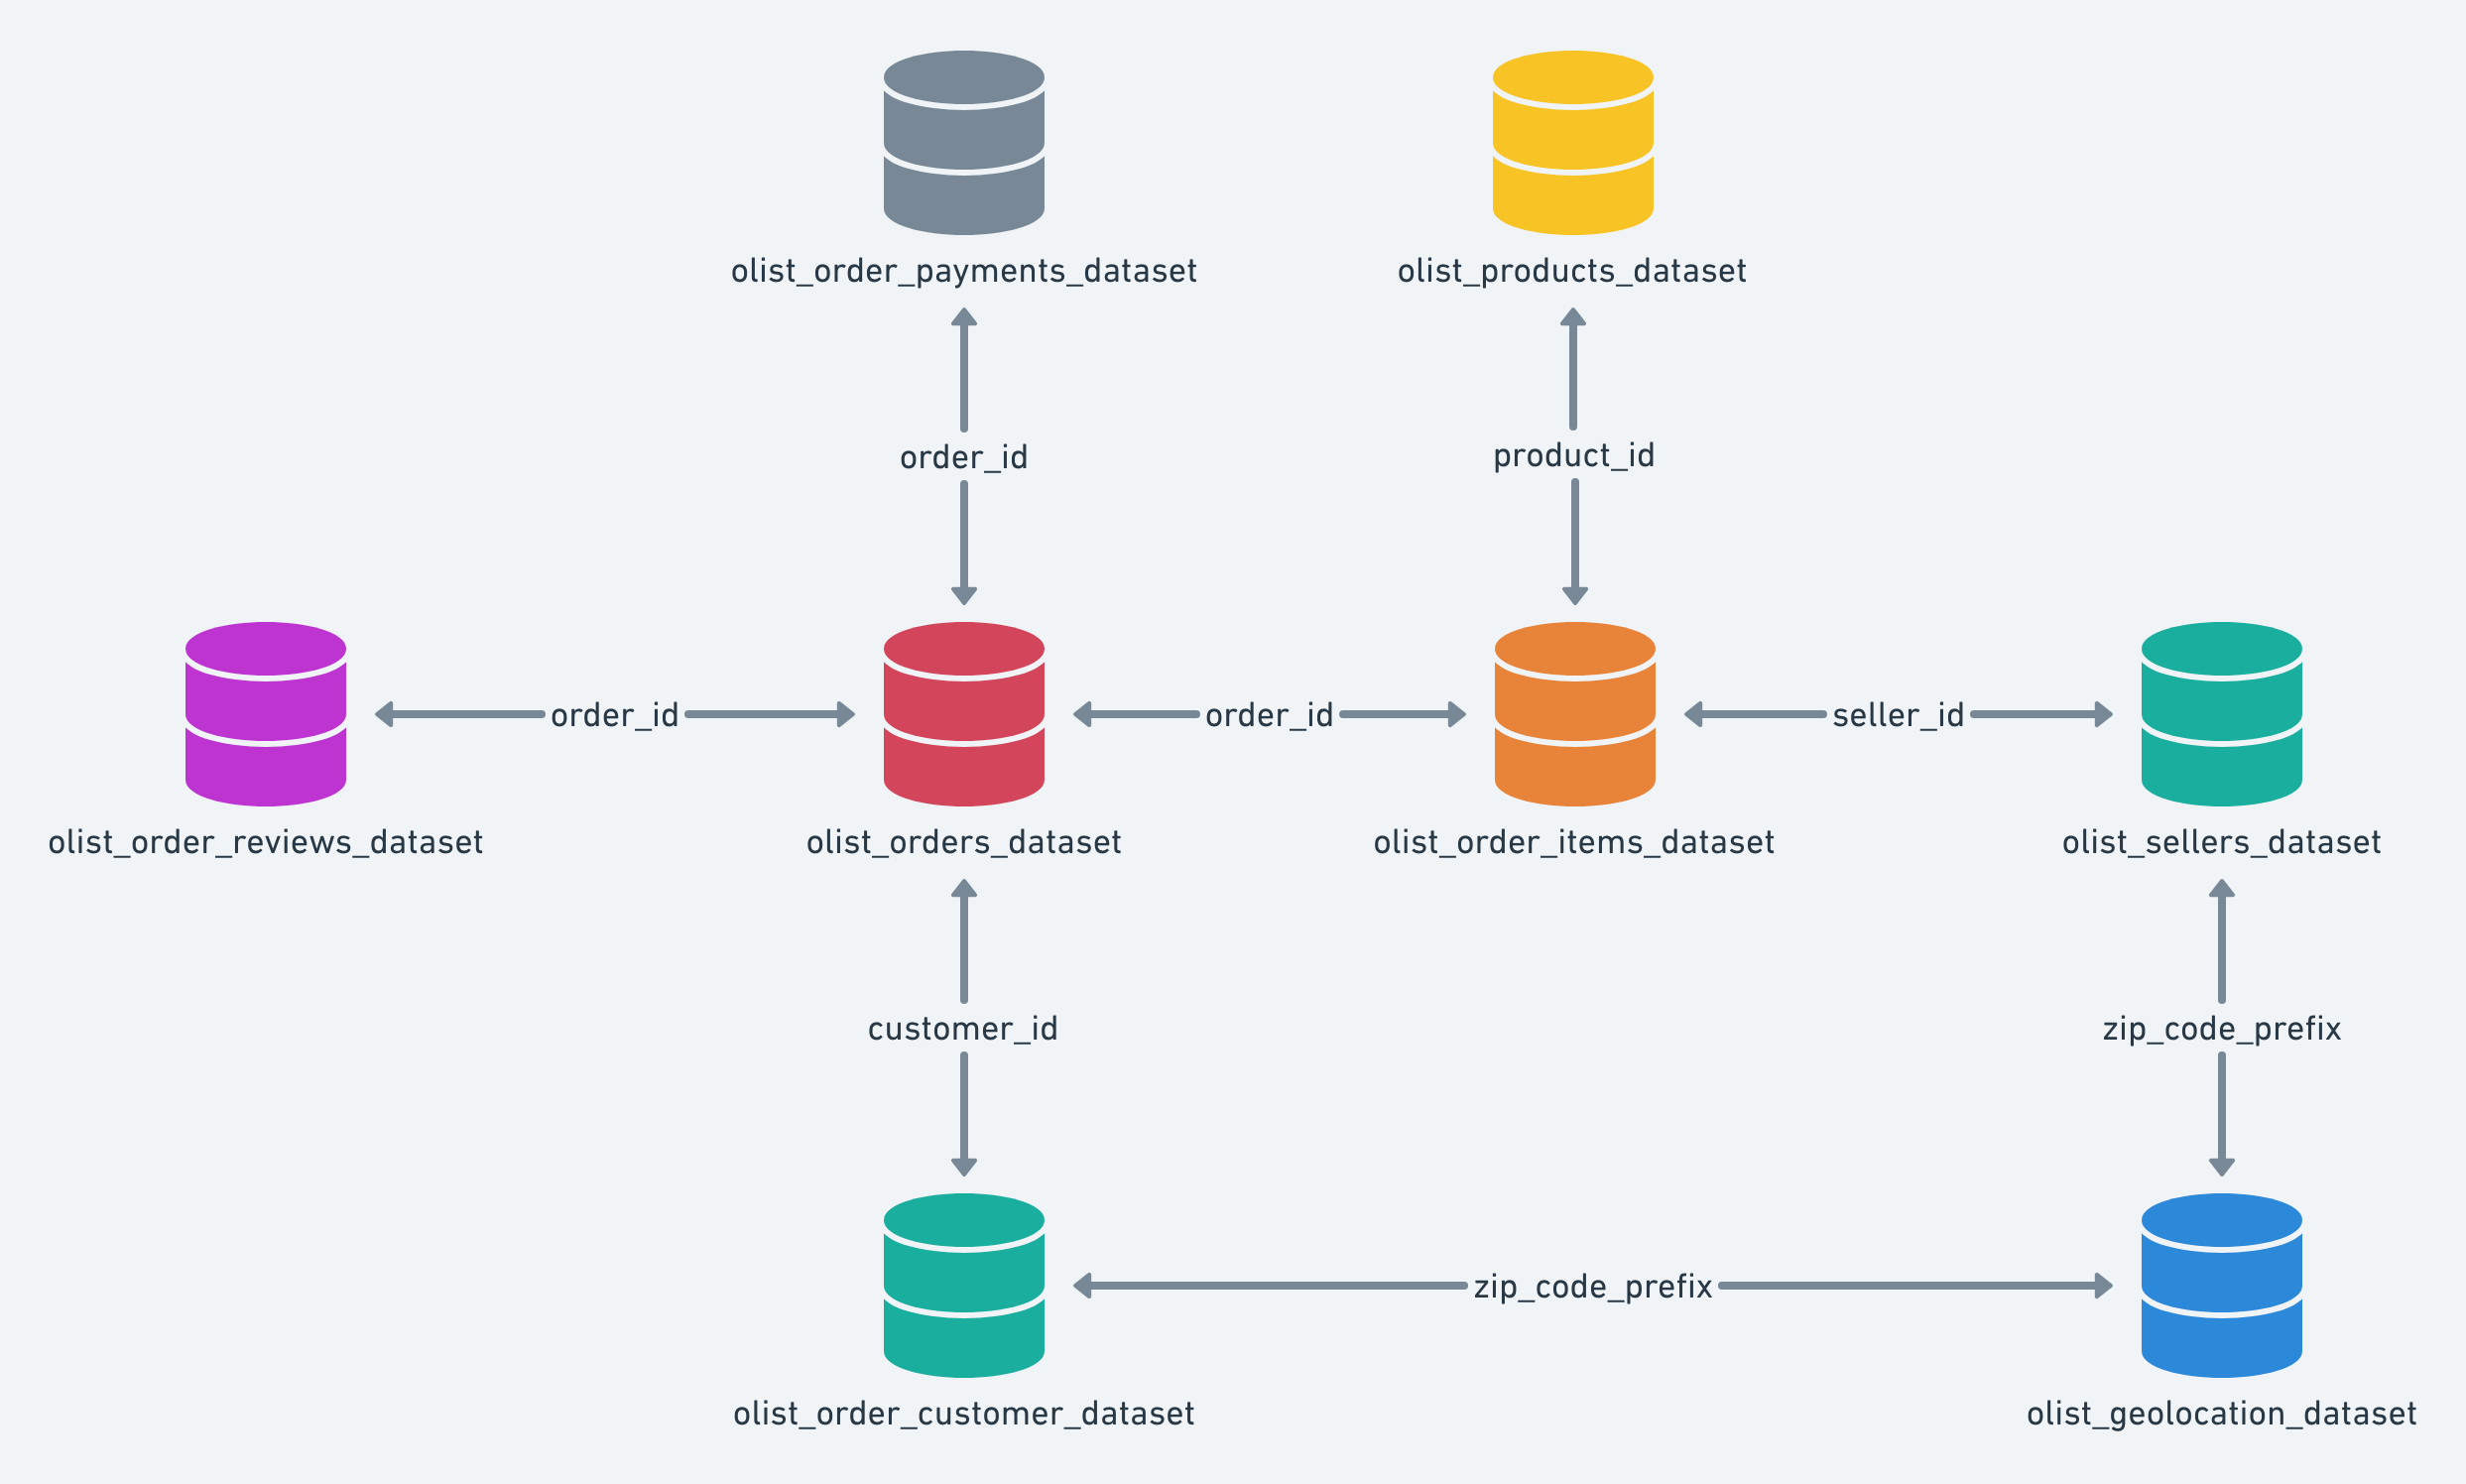

In [1]:
from IPython.display import Image

Image(filename=r'untitled.png')

**Data Dictionary**


| Dataset                     | Column                          | Description                                                                 |
|-----------------------------|--------------------------------|---------------------------------------------------------------------------|
| **olist_customers_dataset**  | customer_id                    | Unique ID of the customer who placed an order                                  |
|                             | customer_unique_id             | 	Unique ID that distinguishes customers more specifically                   |
|                             | customer_zip_code_prefix       | Customer's zip code                                                        |
|                             | customer_city                  | City where the customer resides                                             |
|                             | customer_state                 | State where the customer resides                                           |
| **olist_geolocation_dataset** | geolocation_zip_code_prefix   | Zip code of the geographical location                                                 |
|                             | geolocation_lat                | Latitude of the geographical location                                            |
|                             | geolocation_lng                | Longitude of the geographical location                                           |
|                             | geolocation_city               | City where the geographical location is                                              |
|                             | geolocation_state              | State or province where the geographical location is                       |
| **olist_order_items_dataset** | order_id                      | Unique ID for each order                                             |
|                             | order_item_id                  | Unique ID for each item within an order                                   |
|                             | product_id                     | Unique ID of the purchased product                                                |
|                             | seller_id                      | ID of the seller who sold the product                                            |
|                             | shipping_limit_date            | Shipping deadline for the product                                             |
|                             | price                          | Price of the purchased product                                                  |
|                             | freight_value                  | Shipping cost for the product                                             |
| **olist_order_payments_dataset** | order_id                    | Order ID associated with the payment                                 |
|                             | payment_sequential             | Payment sequence within the order                                          |
|                             | payment_type                   | Payment method (e.g., credit card)                                |
|                             | payment_installments           | Number of installments chosen                                               |
|                             | payment_value                  | Total payment amount                                                    |
| **olist_order_reviews_dataset** | review_id                    | Unique ID for each review given                               |
|                             | order_id                       | Order ID associated with the review                                     |
|                             | review_score                   | Score given by the customer for the product (e.g., 1 to 5)    |
|                             | review_comment_title           | Title of the review comment                                                     |
|                             | review_comment_message         | Content of the review comment given by the customer              |
|                             | review_creation_date           | Date and time when the review was created                                           |
|                             | review_answer_timestamp        | Date and time when the review was answered by the seller or relevant party   |
| **olist_orders_dataset**     | order_id                       | Unique ID for each order                                             |
|                             | customer_id                    | Unique ID of the customer who placed the order                                  |
|                             | order_status                   | Current status of the order (e.g., processing, shipped, or completed)    |
|                             | order_purchase_timestamp       | Date and time when the order was placed                                       |
|                             | order_approved_at              | Date and time when the order was approved                                       |
|                             | order_delivered_carrier_date   | Date the product was shipped by the carrier                                      |
|                             | order_delivered_customer_date  | Date the product was received by the customer                                    |
|                             | order_estimated_delivery_date  | Estimated date for product delivery                               |
| **olist_products_dataset**   | product_category_name_translation | Product name in Portuguese                                        |
|                             | product_category_name          | Product name in Portuguese                                        |
|                             | product_category_name_english  | Product name in English                                         |
|                             | product_id                     | Unique identifier for each product                                    |
|                             | product_category_name          | Category name where the product belongs                               |
|                             | product_name_lenght            | Length of the product name (characters)                                          |
|                             | product_description_lenght     | Length of the product description (characters)                                     |
|                             | product_photos_qty             | Number of available product photos                                                     |
|                             | product_weight_g               | Product weight (grams)                                                         |
|                             | product_length_cm              | Product length (cm)                                                      |
|                             | product_height_cm              | Product height (cm)                                                       |
|                             | product_width_cm               | Product width (cm)                                                        |
| **olist_sellers_dataset**    | seller_id                      | Unique ID for each seller in the system                                       |
|                             | seller_zip_code_prefix         | Zip code of the seller's residence or location                               |
|                             | seller_city                    | City where the seller is located                                           |
|                             | seller_state                   | State or province where the seller is located                    |


# **Import Modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier, 
    VotingClassifier, 
    StackingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score, 
    f1_score, 
    classification_report, 
    fbeta_score,
    RocCurveDisplay, 
    roc_auc_score,
    PrecisionRecallDisplay, 
    average_precision_score,
    make_scorer
)
from sklearn.model_selection import (
    train_test_split, 
    StratifiedKFold, 
    GridSearchCV, 
    RandomizedSearchCV, 
    cross_val_score
)
import pickle
import os
from helper import map_region

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')
geoloc = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
products_en = pd.read_csv('product_category_name_translation.csv')

orders['customer_id'].value_counts()

customer_id
9ef432eb6251297304e76186b10a928d    1
413f7e58270a32396af030a075b924be    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
c701fbfa77791abd05eef9eacf7ea7a8    1
                                   ..
39585f08d13377e50fde35467984e6eb    1
eb3d995301c320683de629f5b4dd0c78    1
f2507ea56d748a23037bb1214964e87d    1
ae8269d850cd3a3d06a56877c450b3f8    1
edb027a75a1449115f6b43211ae02a24    1
Name: count, Length: 99441, dtype: int64

In [4]:
customers['customer_unique_id'].value_counts()

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

In [5]:
display(customers.head(), geoloc.head(), items.head(), payments.head(), reviews.head(), orders.head(), products.head(), sellers.head(), products_en.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# **Data Preprocessing**

## 1. Translate the products name into English (was in Portugese)

In [6]:
products = products.merge(products_en, how='left', on='product_category_name')
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [7]:
#check how many unique values between both to ensure each product has english translation
# pt stands for portuguese

n_products_pt = products['product_category_name'].nunique()
print(f'Number of products in Portuese is: {n_products_pt}')

n_products_en = products_en['product_category_name'].nunique()
print(f'Number of products in English is: {n_products_en}')

Number of products in Portuese is: 73
Number of products in English is: 71


In [8]:
#above result shows that there are 2 missing translations. Code below will perform further check
missing_cat = products.loc[products['product_category_name_english'].isna(), 'product_category_name'].unique()
missing_cat

array([nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

As shown above, there are two categories missing from the product_en and here manual translation will be performed using chatGPT. The translation for 'portateis_cozinha_e_preparadores_de_alimentos' is 'portable_kitchen_and_food_processors'. Here, pc_gamer is already in English, however it will still be incorporated to the 'product_category_name_english'.

In [9]:
products[products['product_category_name'].isin(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'])].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN


In [10]:
mapping = {'pc_gamer': 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_and_food_processors'}
products.loc[products['product_category_name_english'].isna(), 'product_category_name_english'] = (products['product_category_name'].map(mapping))

In [11]:
#check
products[products['product_category_name'].isin(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'])].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,pc_gamer
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,portable_kitchen_and_food_processors
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,portable_kitchen_and_food_processors
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,pc_gamer
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,portable_kitchen_and_food_processors


In [12]:
products['product_category_name'].isna().sum()

610

In [13]:
products['product_category_name_english'].nunique()

73

In [14]:
products['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

Here, we observed that actually the product names are redundant. Thus, we want to create a new column which specifies which group does each product name belong to

In [15]:
# Create a dictionary with mappings to simplify the categories
category_map = {
    'small_appliances': 'home_and_kitchen',
    'home_appliances': 'home_and_kitchen',
    'home_appliances_2': 'home_and_kitchen',
    'air_conditioning': 'home_and_kitchen',
    'home_comfort_2': 'home_and_kitchen',
    'home_confort': 'home_and_kitchen',
    'portable_kitchen_and_food_processors': 'home_and_kitchen',
    'small_appliances_home_oven_and_coffee': 'home_and_kitchen',
    'bed_bath_table': 'home_and_kitchen',
    'housewares': 'home_and_kitchen',
    'kitchen_dining_laundry_garden_furniture': 'home_and_kitchen',
    
    
    'furniture_living_room': 'furniture',
    'furniture_bedroom': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'furniture_decor': 'furniture', 
    
    'fashion_bags_accessories': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashio_female_clothing': 'fashion',
    'fashion_underwear_beach': 'fashion',
     
    'baby': 'baby_and_children',
    'fashion_childrens_clothes': 'baby_and_children', 
    
    'books_general_interest': 'books',
    'books_technical': 'books',
    'books_imported': 'books',
    
    'toys': 'toys_and_games',
    'consoles_games': 'toys_and_games',
    
    'food': 'food_and_beverages',
    'food_drink': 'food_and_beverages',
    'drinks': 'food_and_beverages',
    'la_cuisine': 'food_and_beverages', 
    
    'health_beauty': 'health_and_beauty',
    'diapers_and_hygiene': 'health_and_beauty',
    'perfumery': 'health_and_beauty', 
    
    'sports_leisure': 'sports_and_leisure',
    'fashion_sport': 'sports_and_leisure',
    
    'electronics': 'electronics',
    'computers': 'electronics',
    'computers_accessories': 'electronics',
    'audio': 'electronics',
    'telephony': 'electronics', 
    'tablets_printing_image': 'electronics', 
    'fixed_telephony': 'electronics', 
    'pc_gamer': 'electronics',
    
    'stationery': 'office_and_stationery',
    'office_furniture': 'office_and_stationery', 

    'construction_tools_construction': 'tools_and_construction', 
    'construction_tools_lights': 'tools_and_construction',
    'costruction_tools_garden': 'tools_and_construction',
    'home_construction': 'tools_and_construction',
    'construction_tools_safety': 'tools_and_construction', 
    'garden_tools': 'tools_and_construction',
    'costruction_tools_tools': 'tools_and_construction',

    'signaling_and_security': 'security_and_services',
    'security_and_services': 'security_and_services',

    'cool_stuff': 'gifts_and_miscellaneous',
    'watches_gifts': 'gifts_and_miscellaneous',
    'flowers': 'gifts_and_miscellaneous',
    'party_supplies': 'gifts_and_miscellaneous',
    'christmas_supplies': 'gifts_and_miscellaneous',
    'auto': 'gifts_and_miscellaneous',
    'luggage_accessories': 'gifts_and_miscellaneous',
    
    'market_place': 'marketplace',

    'cds_dvds_musicals': 'media',
    'cine_photo': 'media',
    'dvds_blu_ray': 'media',
    
    'music': 'music_and_art',
    'musical_instruments': 'music_and_art',
    'arts_and_craftmanship': 'music_and_art',
    'arts_and_crafts': 'music_and_art',
    'art': 'music_and_art', 

    'pet_shop': 'pet_shop', 
    
    'industry_commerce_and_business': 'industry_and_business',
    'agro_industry_and_commerce': 'industry_and_business', 
}

In [16]:
products['grouped_category'] = products['product_category_name_english'].map(category_map)

In [17]:
products[['product_category_name_english', 'grouped_category']].head()

,product_category_name_english,grouped_category
0,perfumery,health_and_beauty
1,art,music_and_art
2,sports_leisure,sports_and_leisure
3,baby,baby_and_children
4,housewares,home_and_kitchen


In [18]:
nan_rows = products[products['grouped_category'].notna()][['product_category_name','grouped_category', 'product_category_name_english']]
nan_rows

,product_category_name,grouped_category,product_category_name_english
0,perfumaria,health_and_beauty,perfumery
1,artes,music_and_art,art
2,esporte_lazer,sports_and_leisure,sports_leisure
3,bebes,baby_and_children,baby
4,utilidades_domesticas,home_and_kitchen,housewares
...,...,...,...
32946,moveis_decoracao,furniture,furniture_decor
32947,construcao_ferramentas_iluminacao,tools_and_construction,construction_tools_lights
32948,cama_mesa_banho,home_and_kitchen,bed_bath_table
32949,informatica_acessorios,electronics,computers_accessories


In [19]:
print(products[['grouped_category', 'product_category_name_english']].isna().sum())

grouped_category                 610
product_category_name_english    610
dtype: int64


## 2. Merging data

In [20]:
df = orders.merge(items, how='left', on='order_id')
df = df.merge(payments, how='outer', on='order_id')
df = df.merge(reviews, how='outer', on='order_id')
df = df.merge(products, how='outer', on='product_id')
df = df.merge(customers, how='outer', on='customer_id')
df = df.merge(sellers, how='outer', on='seller_id')

In [21]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,product_category_name_english,grouped_category,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,36.0,small_appliances,home_and_kitchen,3c7e305796add66698959fc7ad176f6b,87502,umuarama,PR,9080.0,santo andre,SP
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,36.0,small_appliances,home_and_kitchen,9de5797cddb92598755a0f76383ddbbb,35490,entre rios de minas,MG,9080.0,santo andre,SP
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,36.0,small_appliances,home_and_kitchen,9915eb9f74b6c11aaf04833f65b00e93,38600,paracatu,MG,9080.0,santo andre,SP
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,1.0,08574b074924071f4e201e151b152b4e,...,39.0,garden_tools,tools_and_construction,dce323533e45e74d215e0fe7fb114118,24710,sao goncalo,RJ,29156.0,cariacica,ES
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,2.0,08574b074924071f4e201e151b152b4e,...,39.0,garden_tools,tools_and_construction,dce323533e45e74d215e0fe7fb114118,24710,sao goncalo,RJ,29156.0,cariacica,ES


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

## 3. Drop the unused columns

The idea here is that to drop columns that are not useful. For example: the reviews are in Portuguese, beside it does not align with the purpose of the analysis, such data type requires different data handling. Same reason goes to the products. the column that will be dropped are:
- review_id
- review_comment_title
- review_comment_message
- review_creation_date
- review_answer_timestamp
- product_name_length
- product_description_length
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm
- product_category_name
- customer_zip_code_prefix (?)
- seller_zip_code_prefix (?)

In [23]:
df.drop(columns=['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name'], inplace= True)  

In [24]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_score                      997
product_category_name_english    2542
grouped_category                 2542
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            833
seller_city 

## 4. Handling duplicate data

Since all the data was merged based on the orders dataset, it makes sense that duplicate values should be eliminated using the order_id. For the remaining columns, having duplicate values is still logical and expected

In [25]:
df = df.drop_duplicates(subset='order_id', keep='first')
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
review_score                      768
product_category_name_english    2188
grouped_category                 2188
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            775
seller_city 

## 5. Drop NaN value

In [26]:
df.dropna(inplace=True)
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
product_category_name_english    0
grouped_category                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       94470 non-null  object 
 1   customer_id                    94470 non-null  object 
 2   order_status                   94470 non-null  object 
 3   order_purchase_timestamp       94470 non-null  object 
 4   order_approved_at              94470 non-null  object 
 5   order_delivered_carrier_date   94470 non-null  object 
 6   order_delivered_customer_date  94470 non-null  object 
 7   order_estimated_delivery_date  94470 non-null  object 
 8   order_item_id                  94470 non-null  float64
 9   product_id                     94470 non-null  object 
 10  seller_id                      94470 non-null  object 
 11  shipping_limit_date            94470 non-null  object 
 12  price                          94470 non-null  flo

## 6. Change data format

In [28]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

for columns in df.columns:
    if columns in date_columns:
        df[columns] = pd.to_datetime(df[columns])
    

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94470 non-null  object        
 1   customer_id                    94470 non-null  object        
 2   order_status                   94470 non-null  object        
 3   order_purchase_timestamp       94470 non-null  datetime64[ns]
 4   order_approved_at              94470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   94470 non-null  datetime64[ns]
 6   order_delivered_customer_date  94470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  94470 non-null  datetime64[ns]
 8   order_item_id                  94470 non-null  float64       
 9   product_id                     94470 non-null  object        
 10  seller_id                      94470 non-null  object        
 11  shipping_limit_date

In [30]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
product_category_name_english    0
grouped_category                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

## 7. Change column name

In [31]:
df = df.rename(columns={'product_category_name_english': 'product_name'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94470 non-null  object        
 1   customer_id                    94470 non-null  object        
 2   order_status                   94470 non-null  object        
 3   order_purchase_timestamp       94470 non-null  datetime64[ns]
 4   order_approved_at              94470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   94470 non-null  datetime64[ns]
 6   order_delivered_customer_date  94470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  94470 non-null  datetime64[ns]
 8   order_item_id                  94470 non-null  float64       
 9   product_id                     94470 non-null  object        
 10  seller_id                      94470 non-null  object        
 11  shipping_limit_date

In [32]:
df.reset_index(drop=True, inplace=True)

# **EDA and Data Visualization**

## 1. Customer segmentation

                 customer_unique_id      first_purchase       last_purchase  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27 2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27 2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03 2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41 2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42 2017-11-14 19:45:42   

   num_orders         segment  
0           1  One-Time Buyer  
1           1  One-Time Buyer  
2           1  One-Time Buyer  
3           1  One-Time Buyer  
4           1  One-Time Buyer  


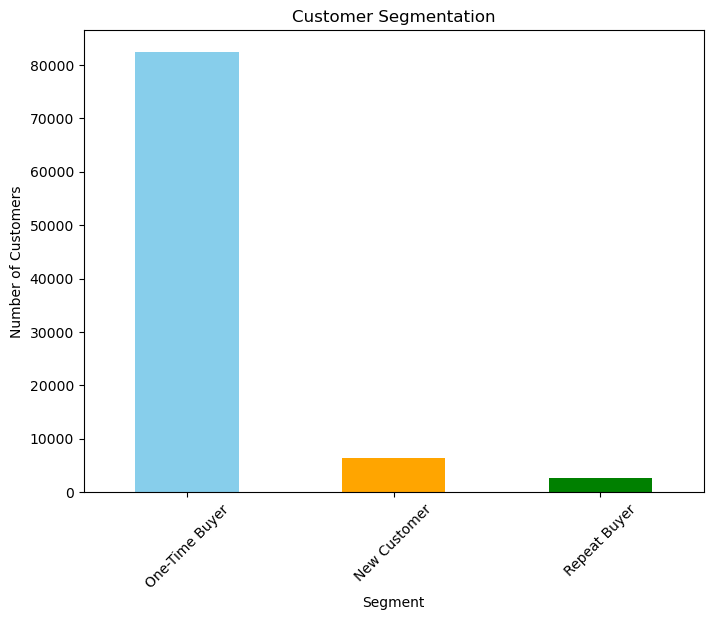

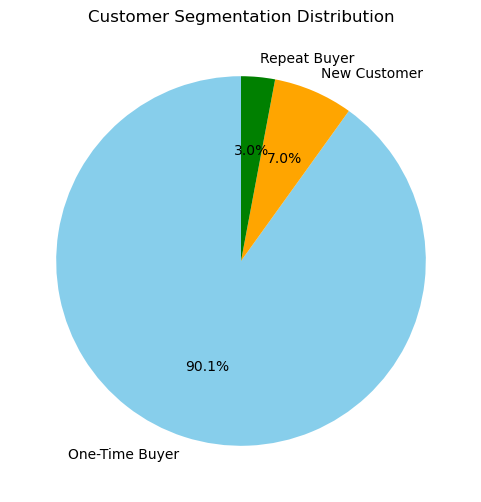

In [33]:
# Set the reference date and count 5 months before 
reference_date = pd.to_datetime("2018-12-31")
threshold_new_customer = reference_date - pd.DateOffset(months=5)

# Create a customer segmentation data frame based on customer_choose the first buying date and number of order
customer_seg = df.groupby('customer_unique_id').agg(
    first_purchase=('order_purchase_timestamp', 'min'),
    last_purchase=('order_purchase_timestamp', 'max'),
    num_orders=('order_id', 'nunique')
).reset_index()

# Function to classified customers
def segment_customer(row):
    if row['num_orders'] > 1:
        return 'Repeat Buyer'
    else:
        # num_orders == 1
        if row['first_purchase'] >= threshold_new_customer:
            return 'New Customer'
        else:
            return 'One-Time Buyer'

# apply the function to each row
customer_seg['segment'] = customer_seg.apply(segment_customer, axis=1)

# show some of the result
print(customer_seg.head())

# Segmentation visualization
# Count number of consumers per-segment
segment_counts = customer_seg['segment'].value_counts()

# Visualization using barchart and pie chart
plt.figure(figsize=(8,6))
segment_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,6))
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
plt.title('Customer Segmentation Distribution')
plt.ylabel('')
plt.show()

In [34]:
customer_seg

,customer_unique_id,first_purchase,last_purchase,num_orders,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,One-Time Buyer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,One-Time Buyer
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,One-Time Buyer
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,One-Time Buyer
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,One-Time Buyer
...,...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36,1,One-Time Buyer
91461,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56,1,One-Time Buyer
91462,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16,1,One-Time Buyer
91463,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41,1,One-Time Buyer


In [35]:
customer_seg['customer_unique_id'].value_counts()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
aa675da7689d6205d9821104b41ae2fe    1
aa7601db46d40e3f6a3a8a7d72797729    1
aa75ba45baa3792324a215d92c965425    1
aa75aabc388e5d825562397365e0ac61    1
                                   ..
551f26c6693657b95e4b6050af3cad95    1
551dd1a720761be07c14ce4a8a7425ec    1
551d7e7f909ea5c58235d9ab0d6e719c    1
551cb9a6b9db0bd6a96672e542ec83d3    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: count, Length: 91465, dtype: int64

From the visualization above, we can see that 90.1% of customers are One-Time Buyers, 7% are Repeat Buyers, and 3% are New Customers. Given this distribution, we cannot define churn solely based on the number of days without a transaction, as the majority of new customers only make a single purchase.

### a. To perform more analysis, customer_seg is merged with the main df based on customer_unique_id

In [36]:
df = df.merge(customer_seg, how='outer', on='customer_unique_id')

### b. Top 5 grouped category per customer segment

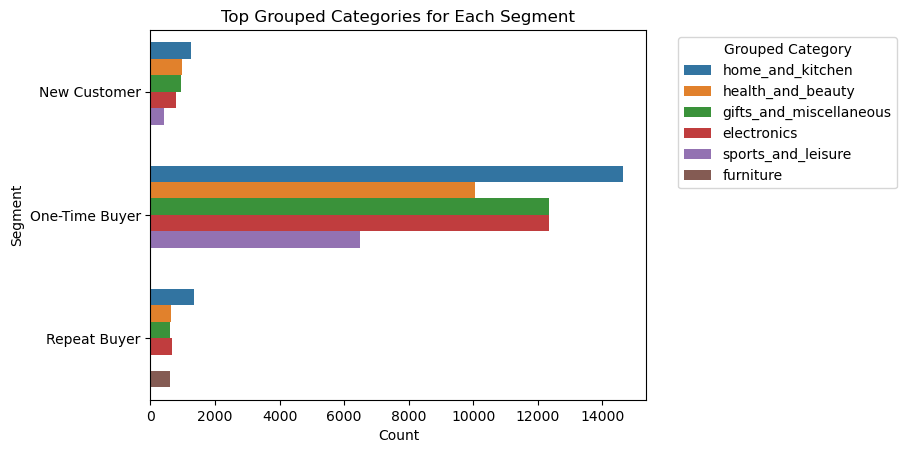

In [37]:
top_categories_per_segment = (
    df.groupby(['segment', 'grouped_category'])
    .size()
    .reset_index(name='count')
    .sort_values(['segment', 'count'], ascending=[True, False])
    .groupby('segment')
    .head(5)  # Select the top category for each segment
)

top_categories_per_segment

sns.barplot(
    data=top_categories_per_segment,
    y='segment',
    x='count',
    hue='grouped_category',
    dodge=True
)


plt.xlabel("Count")
plt.ylabel("Segment")
plt.title("Top Grouped Categories for Each Segment")
plt.legend(title="Grouped Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

From the horizontal bar plot above, it can be seen that grouped categories for each customer segment are the same except repear buyer where it also has furniture in its top 5 the most 

### c. Payment value per customer segment

In [38]:
segment_payment = df.groupby("segment")["payment_value"].sum().reset_index()
segment_payment

,segment,payment_value
0,New Customer,981264.57
1,One-Time Buyer,13048643.09
2,Repeat Buyer,820569.25


/var/folders/zs/76hxkrm573nb0zcdhxx9h2b80000gn/T/ipykernel_17546/2050059408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_payment, x='segment', y='payment_value', palette='viridis')


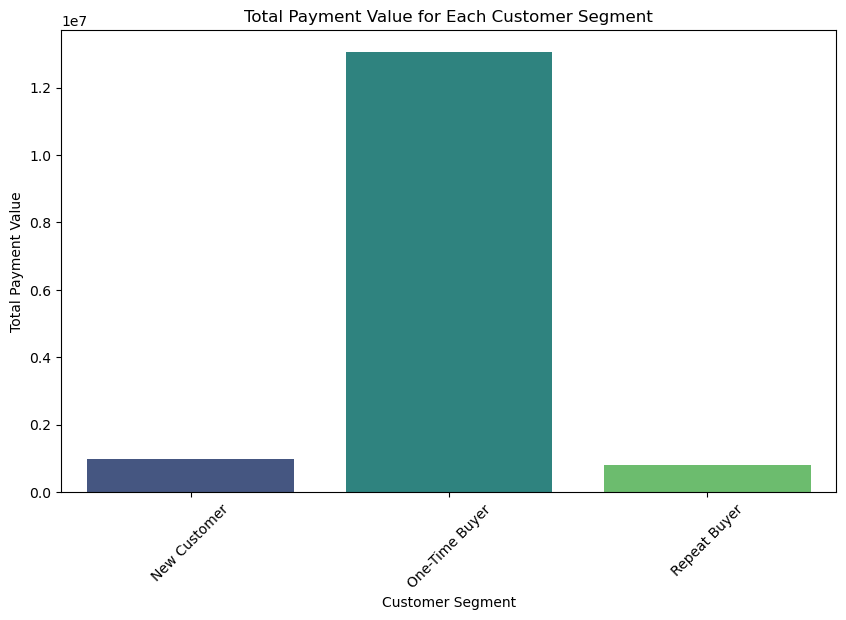

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_payment, x='segment', y='payment_value', palette='viridis')
plt.xlabel("Customer Segment")
plt.ylabel("Total Payment Value")
plt.title("Total Payment Value for Each Customer Segment")
plt.xticks(rotation=45)
plt.show()

The result above correlates with the fact that one time buyer is dominating the customer segment, thus contribute to the overall total payment value. The second highest contributor is new customer and the last is repeat buyer

## 2. Order growth over the years

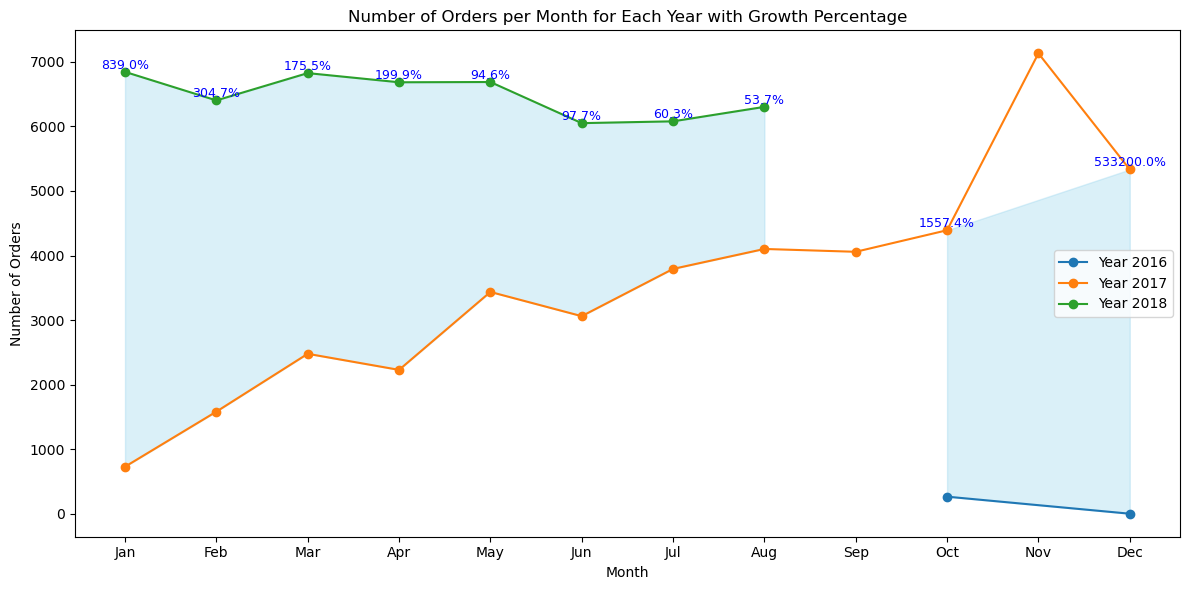

In [40]:
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month

monthly_data = df.groupby(['order_year', 'order_month']).agg(
    number_of_orders=('order_id', 'nunique')  
).reset_index()

plt.figure(figsize=(12, 6))

for year in monthly_data['order_year'].unique():
    year_data = monthly_data[monthly_data['order_year'] == year]
    
    plt.plot(year_data['order_month'], year_data['number_of_orders'], marker='o', label=f'Year {year}')
    
    if year > min(monthly_data['order_year']):
        prev_year_data = monthly_data[monthly_data['order_year'] == year - 1]

        
        merged_data = pd.merge(year_data, prev_year_data, on='order_month', suffixes=('_current', '_prev'))
        
        growth_percentage = (merged_data['number_of_orders_current'] - merged_data['number_of_orders_prev']) / merged_data['number_of_orders_prev'] * 100
        
        plt.fill_between(merged_data['order_month'], merged_data['number_of_orders_prev'], merged_data['number_of_orders_current'], color='skyblue', alpha=0.3)
        
        for i, month in enumerate(merged_data['order_month']):
            plt.text(month, merged_data['number_of_orders_current'][i], f'{growth_percentage.iloc[i]:.1f}%', 
                     ha='center', va='bottom', fontsize=9, color='blue')

plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month for Each Year with Growth Percentage')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()

plt.tight_layout()
plt.show()


The chart visualizes the number of orders placed each month across three years: 2016, 2017, and 2018. The y-axis represents the Number of Orders, ranging from 0 to 7000, while the x-axis lists the months from January (Jan) to December (Dec).
Some Key Observations can be inferred:

**Order Trends Over Months**:
- The number of orders fluctuates across different months. There are noticeable peaks and troughs, indicating seasonal variations in order volumes.
- Certain months, such as November and December, might show higher order volumes, possibly due to holiday shopping or end-of-year sales.

**Year-over-Year Growth**:
- 2017 shows substantial growth compared to 2016, with some months experiencing growth rates as high as 839.0%.
- 2018 continues this growth trend, though at a slightly moderated pace, with high growth percentages.

**Exceptional Growth Spikes**:
- There are extraordinary growth spikes noted, such as 15,374% and 533,200.0%. These could indicate either a significant market expansion, a successful marketing campaign, or possibly a data anomaly that warrants further investigation.

**Overall Growth Trend**:
- The overall trend from 2016 to 2018 is positive, indicating a healthy increase in the number of orders over the years.
- The growth percentages suggest that the business experienced rapid expansion during this period.

## 3. Delivery time

In [41]:
df[['order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date']]

,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date
0,2018-05-21,2018-05-16 20:48:37,2018-05-12 08:18:00
1,2018-05-15,2018-05-10 18:02:42,2018-05-09 12:18:00
2,2017-04-07,2017-04-05 14:38:47,2017-03-13 12:58:30
3,2017-11-13,2017-11-01 21:23:05,2017-10-13 20:08:19
4,2017-12-05,2017-11-27 23:08:56,2017-11-16 19:52:10
...,...,...,...
94465,2017-08-02,2017-07-06 09:22:00,2017-06-23 13:03:27
94466,2018-01-12,2018-01-09 22:28:20,2017-12-21 16:27:01
94467,2017-03-24,2017-02-22 12:45:04,2017-02-08 10:04:37
94468,2018-05-28,2018-05-14 11:54:26,2018-05-03 16:45:00


In [42]:
df['actual_shipping_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

In [43]:
df['actual_shipping_days'] = df['actual_shipping_days'].astype(int)

In [44]:
df['actual_shipping_days'] = df['actual_shipping_days'].where(df['actual_shipping_days'] >= 0, -999)

In [45]:
df['estimated_shipping_days'] = df['order_estimated_delivery_date'] - df['order_delivered_carrier_date']
df['estimated_shipping_days'] = df['estimated_shipping_days'].dt.days.astype(int)

In [46]:
df['estimated_shipping_days'] = df['estimated_shipping_days'].where(df['estimated_shipping_days'] >= 0, -999)

In [47]:
df['shipping_delay'] = df['actual_shipping_days'] - df['estimated_shipping_days']
df['shipping_delay'] = df['shipping_delay'].astype(int)

In [48]:
late = (df['shipping_delay'].gt(0) & df['shipping_delay'].lt(700)).sum()
early = df['shipping_delay'].lt(0).sum()
ontime = df['shipping_delay'].eq(0).sum()
error = df['shipping_delay'].gt(600).sum()

print(late, "orders were late")  
print(early, "orders were early") 
print(ontime, "orders were on time") 
print(error, "system error")

6581 orders were late
86055 orders were early
1389 orders were on time
445 system error


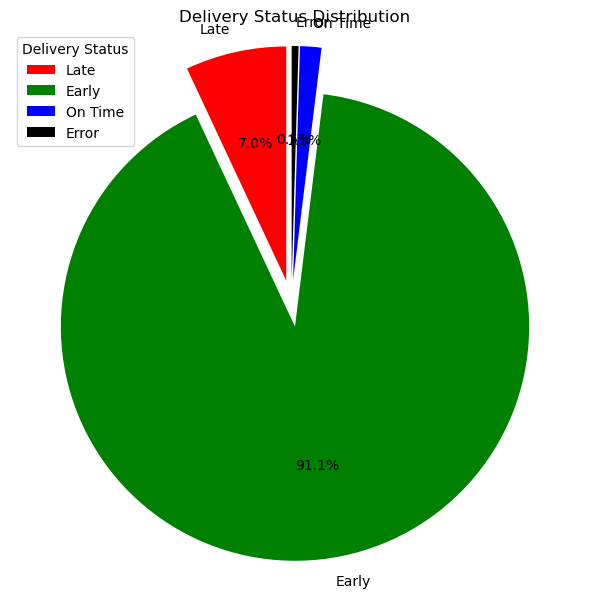

In [49]:
sizes = [late, early, ontime, error]
labels = ['Late', 'Early', 'On Time', 'Error']
colors = ['red', 'green', 'blue', 'black']

explode = (0.1, 0.1, 0.1, 0.1) 

fig, ax = plt.subplots(figsize=(6, 6))  
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
ax.set_title('Delivery Status Distribution')
ax.axis('equal') 

plt.legend(labels, title="Delivery Status", loc="upper left")

plt.tight_layout()

plt.show()

The figure above indicates that delivery performance is strong, with the majority of orders arriving early. However, a closer analysis of late deliveries, which account for 7% of all shipments, provides deeper insights into potential areas for improvement.

In [50]:
def categorize_delivery_status(delay):
    if 0 < delay < 700:
        return 'late'
    elif delay < 0:
        return 'early'
    elif delay == 0:
        return 'ontime'
    elif delay > 600:
        return 'error'
    else:
        return 'unknown' 


df['delivery_status'] = df['shipping_delay'].apply(categorize_delivery_status)

### a. Late Deliveries

In [51]:
late_delivery_info = df[df['delivery_status'] == 'late'][['seller_state', 'customer_state', 'grouped_category', 'review_score']]

In [52]:
seller_city_counts = late_delivery_info['seller_state'].value_counts().reset_index()
customer_city_counts = late_delivery_info['customer_state'].value_counts().reset_index()

seller_city_counts.columns = ['state', 'seller_state']
customer_city_counts.columns = ['state', 'customer_state']

city_counts = pd.merge(seller_city_counts, customer_city_counts, on='state', how='outer').fillna(0)

total_sellers = city_counts['seller_state'].sum()
total_customers = city_counts['customer_state'].sum()

city_counts['seller_percentage'] = (city_counts['seller_state'] / total_sellers) * 100
city_counts['customer_percentage'] = (city_counts['customer_state'] / total_customers) * 100

city_counts[['state', 'seller_percentage', 'customer_percentage']]

,state,seller_percentage,customer_percentage
0,AC,0.000000,0.045586
1,AL,0.000000,1.321988
2,AM,0.015195,0.091172
3,AP,0.000000,0.045586
4,BA,0.455858,6.260447
5,CE,0.121562,2.750342
6,DF,0.668591,2.005774
7,ES,0.258319,3.297371
8,GO,0.243124,2.020969
9,MA,1.154840,1.960188


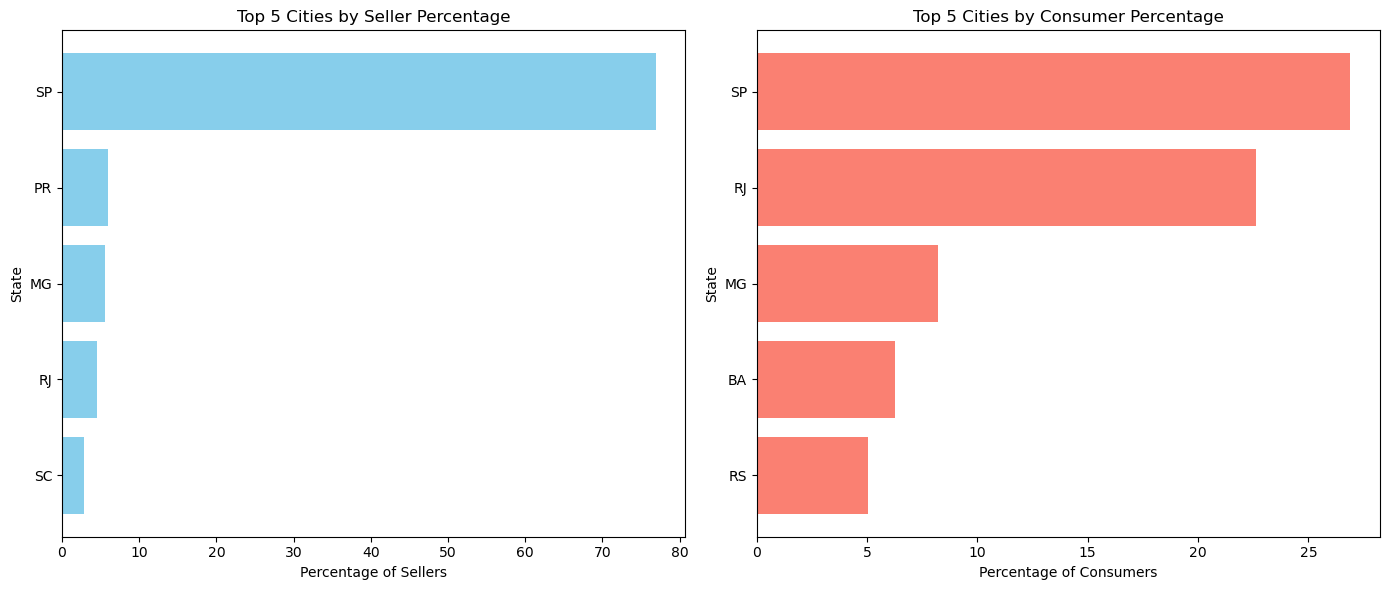

In [53]:
# Get the top 5 cities with the highest percentage of sellers and consumers
top_seller_states = city_counts[['state', 'seller_percentage']].sort_values(by='seller_percentage').tail(5)
top_customer_states = city_counts[['state', 'customer_percentage']].sort_values(by='customer_percentage').tail(5)
# Plotting the top 5 seller cities by percentage
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Seller percentage bar chart
ax[0].barh(top_seller_states['state'], top_seller_states['seller_percentage'], color='skyblue')
ax[0].set_title('Top 5 Cities by Seller Percentage')
ax[0].set_xlabel('Percentage of Sellers')
ax[0].set_ylabel('State')

# Consumer percentage bar chart
ax[1].barh(top_customer_states['state'], top_customer_states['customer_percentage'], color='salmon')
ax[1].set_title('Top 5 Cities by Consumer Percentage')
ax[1].set_xlabel('Percentage of Consumers')
ax[1].set_ylabel('State')

plt.tight_layout()
plt.show()


The figures highlight the top five cities experiencing late deliveries for both sellers and customers. Notably, both perspectives agree that São Paulo (SP), Brazil’s largest city, has the highest number of late deliveries. Sellers from SP account for approximately 75% of these delays, a significant dominant compared to other cities.

For customers, late deliveries are more evenly distributed, with Rio de Janeiro (RJ) also contributing to delays. Several factors may explain these trends:

- High Order Volume – São Paulo, as Brazil’s economic hub, has a high concentration of sellers, leading to increased logistical demands and potential bottlenecks.
- Traffic Congestion – Both SP and RJ are known for heavy traffic, which can slow down transportation and last-mile deliveries.
- Infrastructure Challenges – Delays may also stem from warehouse processing times, road conditions, or inefficiencies in distribution networks.
- Distance and Delivery Routes – For customers, late deliveries may be influenced by the distance from distribution centers, weather conditions, or delivery service reliability.

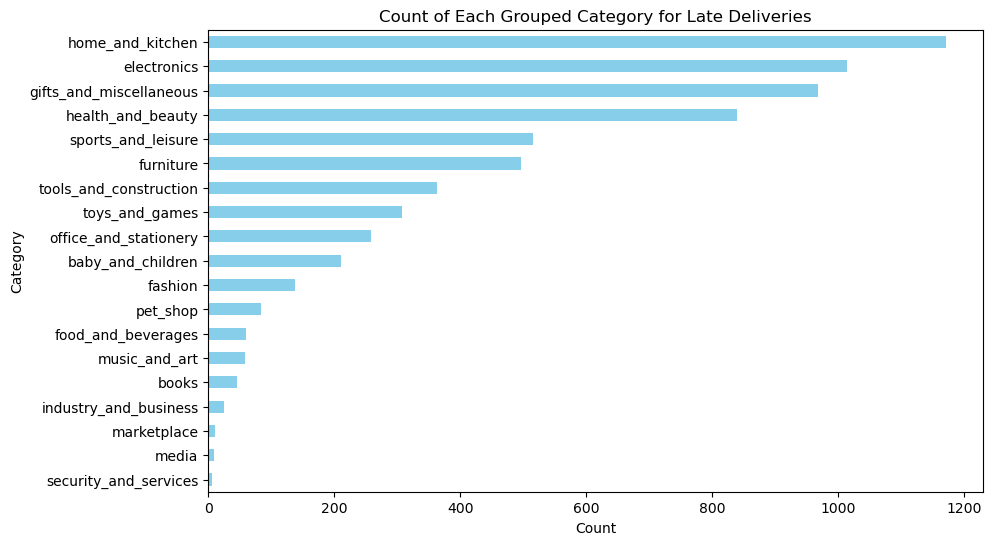

In [54]:
late_delivery_info['grouped_category'].value_counts()

category_counts = late_delivery_info['grouped_category'].value_counts().sort_values(ascending=True)

category_counts.plot(kind='barh', figsize=(10, 6), color='skyblue')

plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Count of Each Grouped Category for Late Deliveries')

plt.show()

Understanding these patterns can help optimize inventory management, streamline logistics, and improve delivery performance for these high-risk categories. The most frequently delayed product categories include Home & Kitchen, Electronics, Gifts & Miscellaneous, and Health & Beauty. These delays are particularly prevalent in major cities like São Paulo (SP) and Rio de Janeiro (RJ), where logistical challenges can exacerbate delivery times.

Several factors may contribute to the higher late delivery rates in these categories:

- High Demand and Order Volume – Home & Kitchen and Electronics are among the most popular product categories, leading to a high number of shipments. The sheer volume can strain logistics networks, especially in large cities like SP, where sellers are concentrated.

- Handling and Warehousing – Many products in these categories require careful handling, especially fragile electronics and home appliances. Additional processing time in warehouses or fulfillment centers may contribute to delays.

- Supply Chain Complexity – Items like electronics and beauty products often involve multiple suppliers and may be subject to import regulations, customs clearance, or stock availability issues, particularly for sellers in SP who distribute products nationwide.

- Gift & Miscellaneous Seasonal Demand – This category experiences demand potentially spikes during holidays and special occasions, leading to potential delivery slowdowns, particularly in urban areas with high order density.

- Last-Mile Delivery Challenges – Traffic congestion in SP and RJ, coupled with large urban areas, can delay last-mile deliveries. Customers in these cities may experience more spread-out delays due to varying distribution efficiencies.

### b. Check Rating 

In [55]:
review = df['review_score'].value_counts()
review

review_score
5.0    55991
4.0    18614
1.0     9165
3.0     7823
2.0     2877
Name: count, dtype: int64

In [56]:
late_review = late_delivery_info['review_score'].value_counts()
late_review

review_score
1.0    3173
5.0    1357
4.0     773
3.0     747
2.0     531
Name: count, dtype: int64

In [57]:
late_percentage = (late_review/late_review.sum()) * 100
late_percentage

review_score
1.0    48.214557
5.0    20.619967
4.0    11.745935
3.0    11.350859
2.0     8.068683
Name: count, dtype: float64

In [58]:
relative_percentage = (late_review/ review) * 100
relative_percentage

review_score
1.0    34.620840
2.0    18.456726
3.0     9.548766
4.0     4.152788
5.0     2.423604
Name: count, dtype: float64

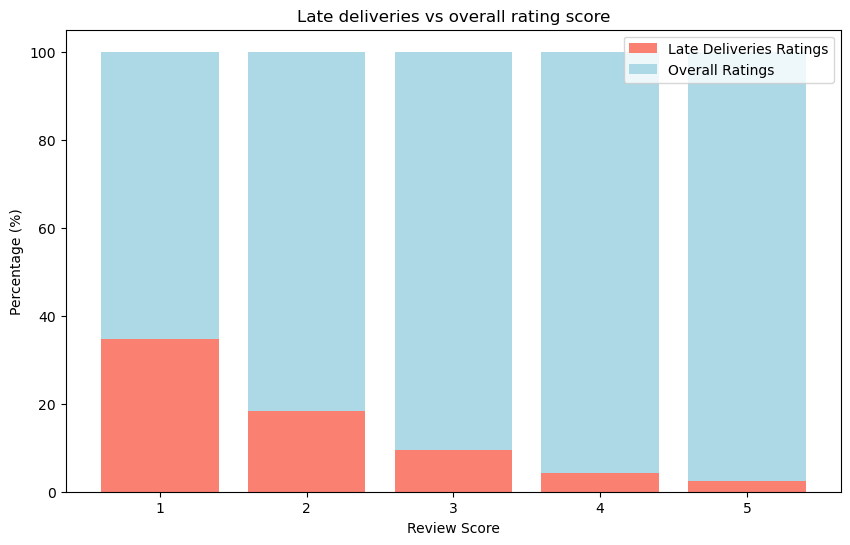

In [59]:
remaining_percentage = 100 - relative_percentage

percentage_df = pd.DataFrame({
    'Review Score': relative_percentage.index,
    'Late Percentage': relative_percentage.values,
    'Remaining Percentage': remaining_percentage.values
})

plt.figure(figsize=(10, 6))
plt.bar(percentage_df['Review Score'], percentage_df['Late Percentage'], label='Late Deliveries Ratings', color='salmon')
plt.bar(percentage_df['Review Score'], percentage_df['Remaining Percentage'], label='Overall Ratings', color='lightblue', bottom=percentage_df['Late Percentage'])

plt.xlabel('Review Score')
plt.ylabel('Percentage (%)')
plt.title('Late deliveries vs overall rating score')
plt.legend()

plt.show()

The plot above shows that late deliveries account for 34% of the overall 1-star ratings. Additionally, within the late delivery category, 1-star ratings represent 48% of the total. For 5-star ratings within the late delivery group, the value is 1357, which constitutes 20% of the total late deliveries. However, when considering the entire dataset, this does not significantly affect the overall 5-star rating distribution, unlike the 1-star ratings. 

## 4. Grouped category exploration

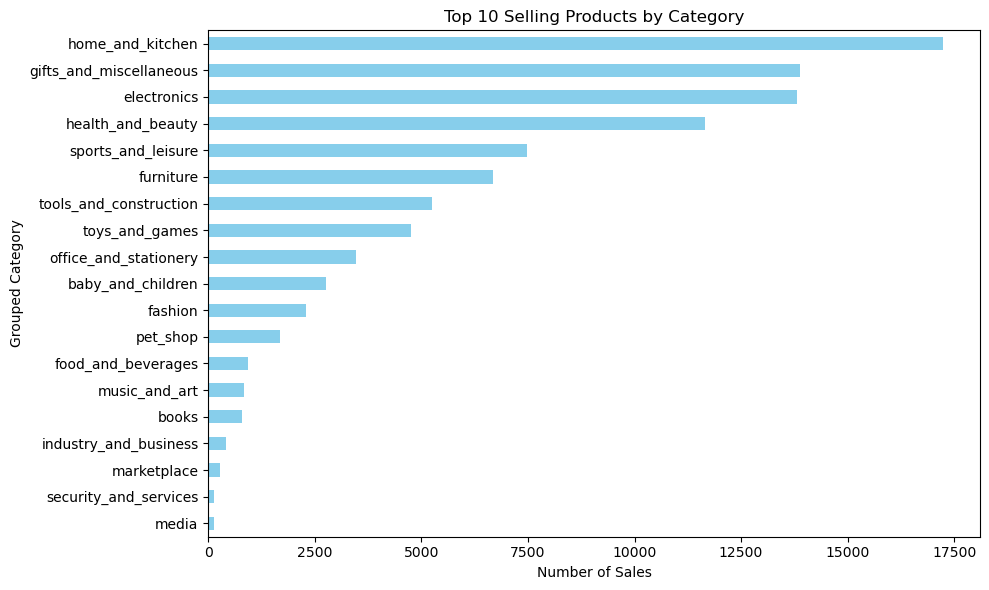

In [60]:
top_selling_products = df['grouped_category'].value_counts().head(10)

top_selling_products = df['grouped_category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Selling Products by Category')
plt.xlabel('Number of Sales')
plt.ylabel('Grouped Category')
plt.tight_layout()
plt.show()

### a. Highest total price per grouped category

In [61]:
total_price_per_product = df.groupby('grouped_category')[['price']].sum().reset_index()
total_price_per_product_sorted = total_price_per_product.sort_values(by='price', ascending=False)
total_price_per_product_sorted

,grouped_category,price
6,gifts_and_miscellaneous,2384004.36
8,home_and_kitchen,1960418.57
7,health_and_beauty,1533312.88
2,electronics,1462072.81
16,sports_and_leisure,875703.65
17,tools_and_construction,708138.63
5,furniture,659584.35
18,toys_and_games,588065.42
13,office_and_stationery,415869.45
0,baby_and_children,384016.60


/var/folders/zs/76hxkrm573nb0zcdhxx9h2b80000gn/T/ipykernel_17546/4070045408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


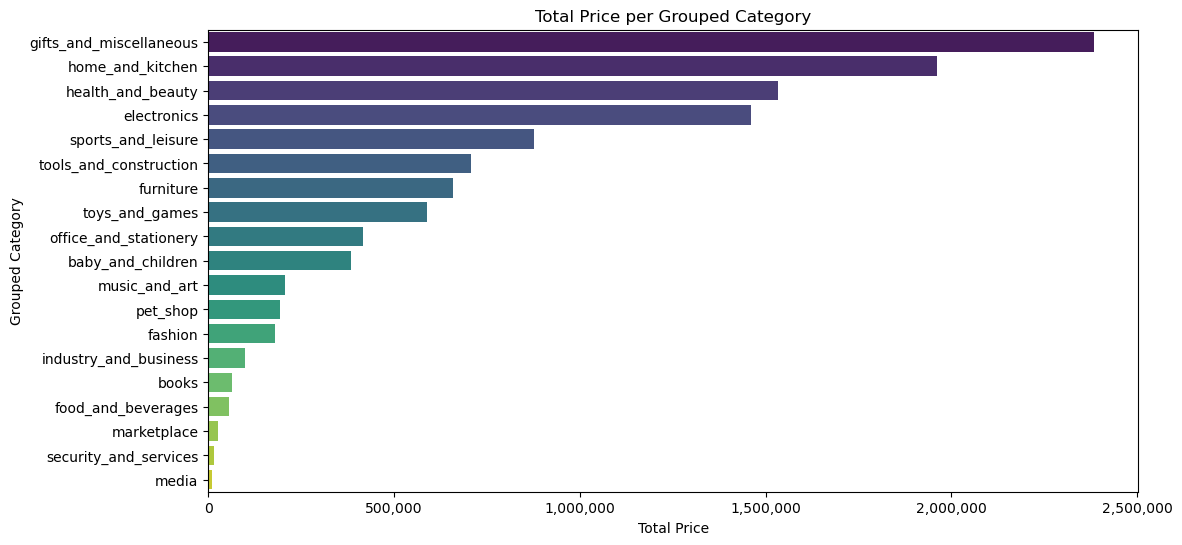

In [62]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=total_price_per_product_sorted, 
    y='grouped_category', 
    x='price', 
    palette='viridis'
)

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Adds comma separator

plt.xlabel("Total Price")
plt.ylabel("Grouped Category")
plt.title("Total Price per Grouped Category")

plt.show()

From the two figures, we can observe the following:

- High Sales ≠ Highest Revenue
"Home & Kitchen" has the highest number of sales, but "Gifts & Miscellaneous" has the highest total revenue. This suggests that while home-related products sell in large quantities, the average price per unit may be lower than that of gifts and miscellaneous products.

- Categories with Strong Performance in Both Sales and Revenue
"Home & Kitchen," "Gifts & Miscellaneous," "Electronics," and "Health & Beauty" appear at the top of both rankings, indicating that these categories have both high sales volume and significant revenue contributions.

- High Revenue but Lower Sales
"Gifts & Miscellaneous" has a much higher total price ranking compared to its sales rank, indicating that products in this category tend to be higher in price. "Health & Beauty" also performs better in revenue relative to sales, suggesting premium pricing in this category.

- High Sales but Lower Revenue
"Sports & Leisure" and "Furniture" are ranked relatively high in sales but drop slightly in total revenue, indicating that these products might have lower price points or more discounts.

- Low Sales and Low Revenue
"Media," "Security & Services," "Marketplace," and "Food & Beverages" are at the bottom in both charts, implying that these categories contribute the least to overall business performance.

### b. Rating per grouped category

In [63]:
category_total_counts = df['grouped_category'].value_counts().reset_index()

category_total_counts.columns = ['grouped_category', 'total_count']

category_rating_counts = df.groupby(['grouped_category', 'review_score']).size().reset_index(name='count')

category_rating_counts = category_rating_counts.merge(category_total_counts, on='grouped_category', how='left')

category_rating_counts['percentage'] = (category_rating_counts['count'] / category_rating_counts['total_count']) * 100

category_rating_counts[['grouped_category', 'review_score', 'count', 'percentage']]


,grouped_category,review_score,count,percentage
0,baby_and_children,1.0,290,10.537791
1,baby_and_children,2.0,86,3.125000
2,baby_and_children,3.0,239,8.684593
3,baby_and_children,4.0,510,18.531977
4,baby_and_children,5.0,1627,59.120640
...,...,...,...,...
90,toys_and_games,1.0,414,8.723135
91,toys_and_games,2.0,119,2.507375
92,toys_and_games,3.0,389,8.196376
93,toys_and_games,4.0,869,18.310156


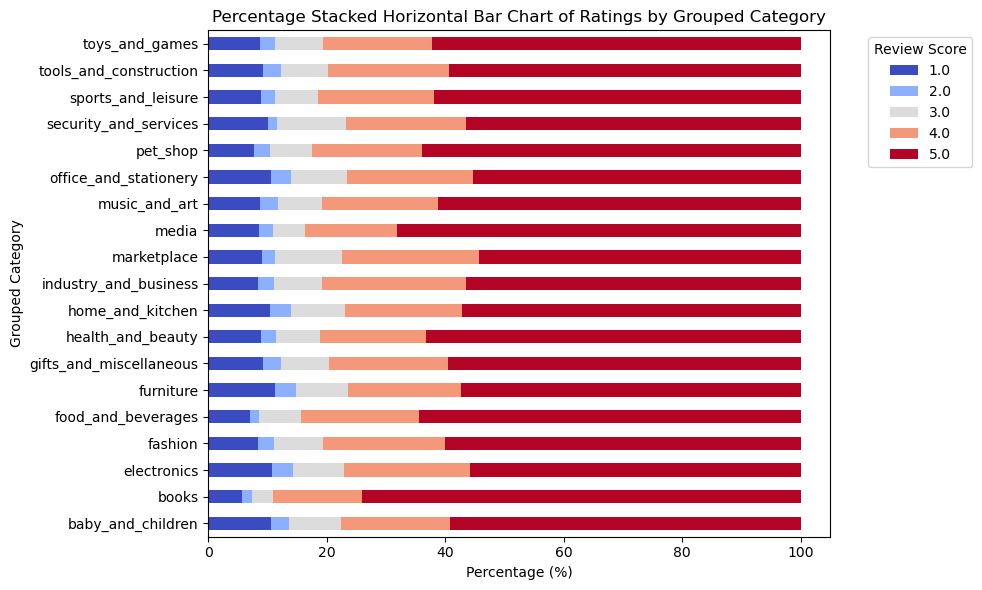

In [64]:
pivot_percentage_data = category_rating_counts.pivot_table(index='grouped_category', columns='review_score', values='percentage', aggfunc='sum')

pivot_percentage_data.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Percentage Stacked Horizontal Bar Chart of Ratings by Grouped Category')
plt.xlabel('Percentage (%)')
plt.ylabel('Grouped Category')
plt.legend(title='Review Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The bar chart illustrates the distribution of ratings across various grouped product categories. The x-axis represents the percentage of each rating while the y-axis lists different grouped categories such as books, media, and furniture. 

Each bar is divided into five colors, corresponding to different ratings, as shown by the legend. The most dominant rating across all categories are 5 ratings, followed by four and one. It is notable that consumers rarely give two and three stars rating. Notably, there is no significant difference of rating distribution between grouped category.

## 5. Payment method

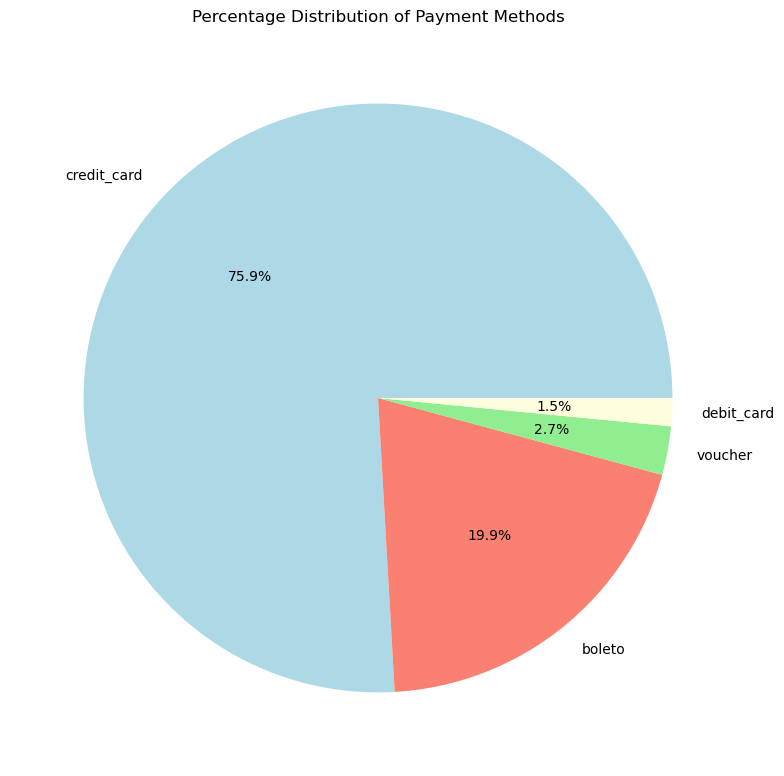

In [65]:
payment_method_counts = df['payment_type'].value_counts()
payment_method_percentage = (payment_method_counts / len(df)) * 100

plt.figure(figsize=(8, 8))
payment_method_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon', 'lightgreen', 'lightyellow'])
plt.title('Percentage Distribution of Payment Methods')
plt.ylabel('')
plt.tight_layout()
plt.show()

### a. Payment type per grouped category

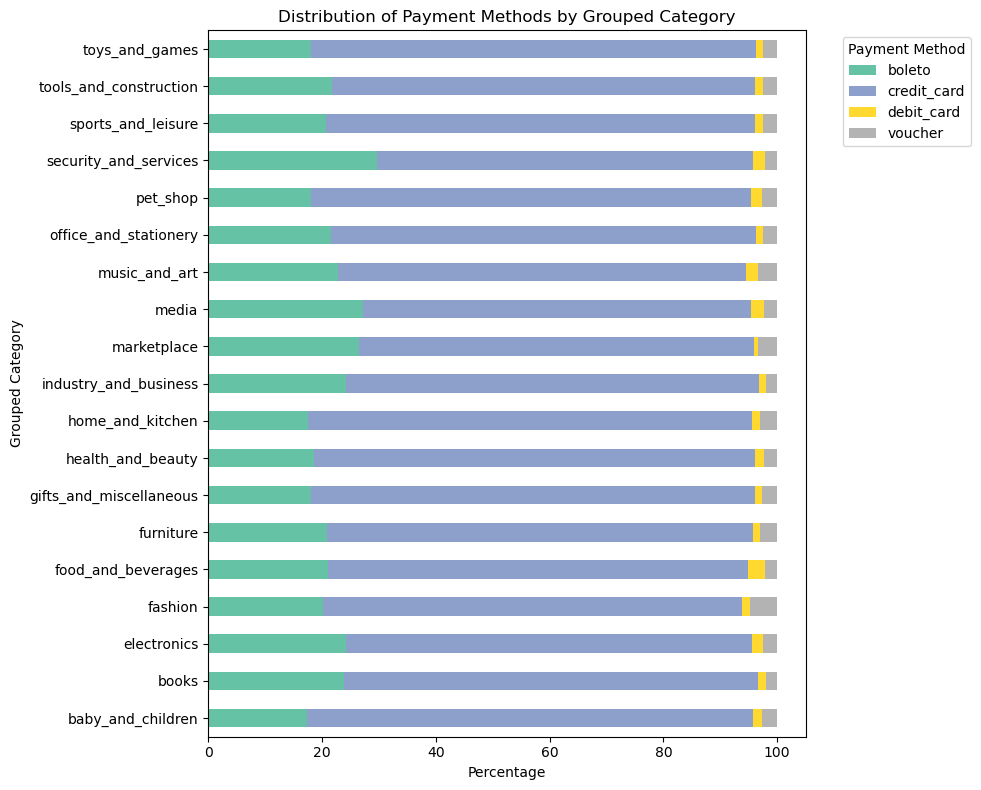

In [66]:
category_payment_counts = df.groupby(['grouped_category', 'payment_type']).size().unstack(fill_value=0)

category_payment_percentage = category_payment_counts.div(category_payment_counts.sum(axis=1), axis=0) * 100
category_payment_percentage.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='Set2')

plt.xlabel('Percentage')
plt.ylabel('Grouped Category')
plt.title('Distribution of Payment Methods by Grouped Category')

plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() 
plt.show()

The bar chart illustrates the distribution of payment methods across various grouped product categories. Each bar is divided into four colors, corresponding to different payment methods: boleto (green), credit card (blue), debit card (yellow), and voucher (gray). 

The most dominant payment method across all categories is the credit card, occupying the majority of each bar. This suggests that consumers primarily rely on credit cards for purchases regardless of the category.

Other payment methods such as boleto and voucher appear in smaller proportions, with debit card contributing a minor share in most cases. Categories such as sports and leisure, industry and business, and electronics show noticeable usage of boleto, but it remains secondary to credit card transactions.

Overall, the chart indicates a clear trend where credit cards dominate online transactions, with alternative methods like boleto and vouchers playing a supplementary role in specific categories, in line with the pie chart above descriving the most used payment method. But there is no clear distinction between the type of payment and the grouped categories.

# **Churn Analysis**

From the **EDA and Data Visualization**, we can see that **90.1%** of customers are **One-Time Buyers**, **7%** are **Repeat Buyers**, and **3%** are **New Customers**. Given this composition, we cannot define churn solely based on the number of days without a transaction, as the majority of customers have made only one purchase.

Therefore, we need to define churn separately for each customer segment:

- One-Time Buyer: If the customer does not make a second purchase within a certain period (6 months) after the first purchase, they are considered churned.
- Repeat Buyer: If the customer does not make another purchase within a certain period (6 months) after their last purchase, they are considered churned.
- New Customer: Since this segment consists of customers from the last 5 months, there is not yet enough data to determine churn. They have the potential to become repeat buyers, so further observation is necessary.

This approach ensures a more accurate definition of churn, aligning with the characteristics of each customer segment.

In [67]:
# 6 months
threshold = 180

In [68]:
customer_seg['customer_unique_id'].value_counts()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
aa675da7689d6205d9821104b41ae2fe    1
aa7601db46d40e3f6a3a8a7d72797729    1
aa75ba45baa3792324a215d92c965425    1
aa75aabc388e5d825562397365e0ac61    1
                                   ..
551f26c6693657b95e4b6050af3cad95    1
551dd1a720761be07c14ce4a8a7425ec    1
551d7e7f909ea5c58235d9ab0d6e719c    1
551cb9a6b9db0bd6a96672e542ec83d3    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: count, Length: 91465, dtype: int64

In [69]:
def define_churn(row):
    segment = row['segment']
    first_purchase = row['first_purchase']
    last_purchase = row['last_purchase']
    num_orders = row['num_orders']
    
    # Hitung selisih hari
    days_since_first = (reference_date - first_purchase).days
    days_since_last = (reference_date - last_purchase).days
    
    if segment == 'New Customer':
        # Belum cukup waktu untuk menyimpulkan churn
        return 0
    
    elif segment == 'One-Time Buyer':
        # Jika > 6 bulan dari reference date, dianggap churn
        if days_since_first > threshold:
            return 1
        else:
            return 0
    
    elif segment == 'Repeat Buyer':
        # Jika recency > 180 hari, anggap churn
        # Silakan sesuaikan 180 dengan threshold lain jika perlu
        if days_since_last > threshold:
            return 1
        else:
            return 0

customer_seg['churn'] = customer_seg.apply(define_churn, axis=1)


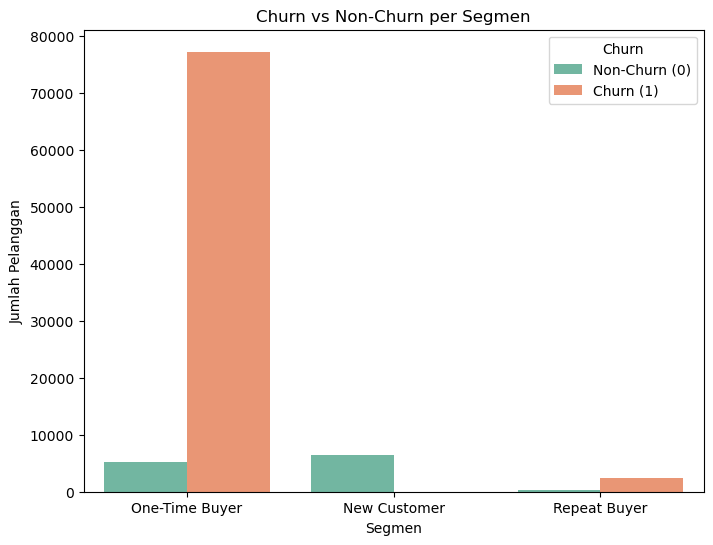

churn              0      1
segment                    
New Customer    6368      0
One-Time Buyer  5153  77239
Repeat Buyer     383   2322
churn                    0          1
segment                              
New Customer    100.000000   0.000000
One-Time Buyer    6.254248  93.745752
Repeat Buyer     14.158965  85.841035


In [70]:
# Visualisasi distribusi churn per segmen
plt.figure(figsize=(8,6))
sns.countplot(data=customer_seg, x='segment', hue='churn', palette='Set2')
plt.title("Churn vs Non-Churn per Segmen")
plt.xlabel("Segmen")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Churn", labels=["Non-Churn (0)", "Churn (1)"])
plt.show()

# Tabel count
churn_counts = pd.crosstab(customer_seg['segment'], customer_seg['churn'])
print(churn_counts)

# Tabel persentase per baris (setiap segmen)
churn_pct = pd.crosstab(customer_seg['segment'], customer_seg['churn'], normalize='index') * 100
print(churn_pct)


## 1. Analysis Insights

### a. New Customer
- **Result:** As expected, new customers make only one purchase by default and are not classified as churn.  
- **Interpretation:** New customers do not yet have enough transaction history to show a repeat purchase pattern.  
- **Implication:** The main focus for this segment is monitoring; we wait for them to transition into a **One-Time Buyer** or **Repeat Buyer** before implementing more aggressive retention strategies.  

### b. One-Time Buyer
- **Result:** For the **One-Time Buyer** segment, churn cannot be determined using a single universal cutoff since Olist sells various products with different purchase cycles.  
- **Interpretation:** Since these customers have only made one transaction, we need to set a specific threshold for each product category, plus an additional tolerance of **1.5×** the base threshold. This threshold is then compared with the first purchase date to determine whether the customer has surpassed the critical time limit indicating potential churn.  
- **Implication:** This approach requires the creation of **dynamic thresholds** based on product categories to identify **One-Time Buyers** at risk, ensuring that retention strategies are more targeted.  

### c. Repeat Buyer
- **Result:** Although **Repeat Buyers** have made multiple transactions, they may have purchased from different product categories with varying cycles.  
- **Interpretation:** For this segment, we do not rely solely on the average **Inter-Purchase Time (IPT)** as a churn indicator, but we also need to consider specific thresholds for each product category they have purchased.  
- **Implication:** Since **Repeat Buyers** have diverse shopping habits, the most appropriate approach is to use the **highest threshold** among the categories they have purchased from. This logic assumes that a customer is considered **churned** if they do not make another purchase within a period exceeding the longest threshold of those product categories, plus an extra tolerance of **1.5×** the base threshold. This way, retention strategies for **Repeat Buyers** can be more **realistic** and **personalized**, taking into account their actual purchasing patterns.  

### d. Conclusion
- **New Customer:** Intensive monitoring is needed, as they have not yet shown a repeat purchase pattern.  
- **One-Time Buyer:** Churn is determined based on a **dynamic threshold** set for each product category, comparing the category’s time cutoff with the first purchase date.  
- **Repeat Buyer:** Since these customers purchase from various categories, the **highest threshold** among their purchased categories is used, plus a **1.5×** tolerance. This approach, combined with **Inter-Purchase Time (IPT)** analysis, provides an appropriate time buffer based on their shopping habits.  


In [71]:
orders_items_merged = pd.merge(orders, items, on='order_id', how='left')
orders_with_category = pd.merge(orders_items_merged, products, on='product_id', how='left')

customers_subset = customers[['customer_id', 'customer_unique_id']]
orders_with_category = pd.merge(orders_with_category, customers_subset, on='customer_id', how='left')

category_threshold = {
    'home_and_kitchen': 120,
    'furniture': 240,
    'fashion': 90,
    'baby_and_children': 90,
    'books': 60,
    'toys_and_games': 120,
    'food_and_beverages': 30,
    'health_and_beauty': 60,
    'sports_and_leisure': 120,
    'electronics': 240,
    'office_and_stationery': 120,
    'tools_and_construction': 180,
    'security_and_services': 180,
    'gifts_and_miscellaneous': 90,
    'marketplace': 120,
    'media': 60,
    'music_and_art': 90,
    'pet_shop': 60,
    'industry_and_business': 240,
}

fallback_threshold = 180

# Map threshold for each transaction
orders_with_category['cat_threshold'] = orders_with_category['grouped_category'].apply(lambda x: category_threshold.get(x, fallback_threshold))

# Find the category with the smallest threshold per customer 
# Sort based on customer_unique_id and cat_threshold (ascending)
orders_sorted = orders_with_category.sort_values(by=['customer_unique_id', 'cat_threshold'])
# Take the first row for each customer_unique_id
min_threshold_category = orders_sorted.groupby('customer_unique_id', as_index=False).first()
# Keep only the necessary columns: customer_unique_id and grouped_category (as the category with the smallest threshold)
min_threshold_category = min_threshold_category[['customer_unique_id', 'grouped_category']]
min_threshold_category.rename(columns={'grouped_category': 'lowest_threshold_category'}, inplace=True)

orders_sorted_max = orders_with_category.sort_values(by=['customer_unique_id', 'cat_threshold'], ascending=[True, False])
# Take the first row for each customer_unique_id
max_threshold_category = orders_sorted_max.groupby('customer_unique_id', as_index=False).first()
# Keep only the necessary columns: customer_unique_id and grouped_category (as the category with the highest threshold)
max_threshold_category = max_threshold_category[['customer_unique_id', 'grouped_category']]
max_threshold_category.rename(columns={'grouped_category': 'highest_threshold_category'}, inplace=True)

# Merge with customer_seg specifically for Repeat Buyer 
# Merge with customer_seg (make sure customer_seg already has customer_unique_id)
customer_seg = pd.merge(customer_seg, min_threshold_category, on='customer_unique_id', how='left')
customer_seg = pd.merge(customer_seg, max_threshold_category, on='customer_unique_id', how='left')
customer_seg.head()

,customer_unique_id,first_purchase,last_purchase,num_orders,segment,churn,lowest_threshold_category,highest_threshold_category
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,One-Time Buyer,1,home_and_kitchen,home_and_kitchen
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,One-Time Buyer,1,health_and_beauty,health_and_beauty
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,One-Time Buyer,1,office_and_stationery,office_and_stationery
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,One-Time Buyer,1,electronics,electronics
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,One-Time Buyer,1,electronics,electronics


In [72]:
# Ensure the timestamp column is in datetime format
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Merge Orders with Customers to Get customer_unique_id 
# For example, orders has a 'customer_id' column and customers has 'customer_id' and 'customer_unique_id'
orders_customers = pd.merge(orders, customers[['customer_id', 'customer_unique_id']],
                            on='customer_id', how='left')

# Sort Data and Calculate the Day Difference Between Transactions 
orders_customers = orders_customers.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])

# Calculate the difference in days between purchases for each customer
orders_customers['purchase_diff'] = orders_customers.groupby('customer_unique_id')['order_purchase_timestamp'] \
                                                    .diff().dt.days

# Compute the Average Day Difference (avg_inter_purchase_time) per Customer 
customer_ipt = orders_customers.groupby('customer_unique_id')['purchase_diff'].mean().reset_index()
customer_ipt.rename(columns={'purchase_diff': 'avg_inter_purchase_time'}, inplace=True)

# Merge the Result into customer_seg 
# Ensure that customer_seg already has the 'customer_unique_id' column
customer_seg = pd.merge(customer_seg, customer_ipt, on='customer_unique_id', how='left')

# Check the result
customer_seg.head()


,customer_unique_id,first_purchase,last_purchase,num_orders,segment,churn,lowest_threshold_category,highest_threshold_category,avg_inter_purchase_time
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,One-Time Buyer,1,home_and_kitchen,home_and_kitchen,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,One-Time Buyer,1,health_and_beauty,health_and_beauty,NaN
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,One-Time Buyer,1,office_and_stationery,office_and_stationery,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,One-Time Buyer,1,electronics,electronics,NaN
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,One-Time Buyer,1,electronics,electronics,NaN


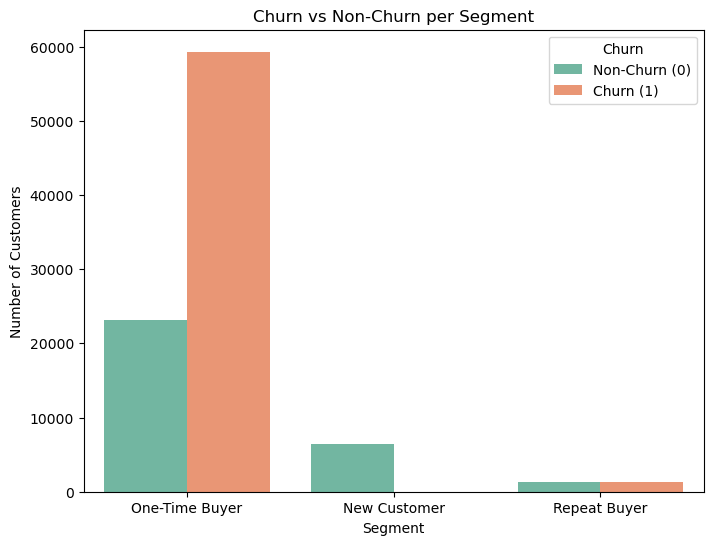

churn               0      1
segment                     
New Customer     6368      0
One-Time Buyer  23081  59311
Repeat Buyer     1364   1341
churn                    0          1
segment                              
New Customer    100.000000   0.000000
One-Time Buyer   28.013642  71.986358
Repeat Buyer     50.425139  49.574861


In [73]:
def define_churn(row):
    segment = row['segment']
    first_purchase = row['first_purchase']
    last_purchase = row['last_purchase']
    
    # Calculate the day difference
    days_since_first = (reference_date - first_purchase).days
    days_since_last = (reference_date - last_purchase).days

    if segment == 'New Customer':
        # Not enough time to determine churn
        return 0
    elif segment == 'One-Time Buyer':
        # Use threshold based on highest_threshold_category
        cat = row['highest_threshold_category']
        if pd.isna(cat):
            threshold_value = fallback_threshold
        else:
            threshold_value = category_threshold.get(cat, fallback_threshold) * 2
        return 1 if days_since_first > threshold_value else 0

    elif segment == 'Repeat Buyer':
        # Select the category with the lowest threshold that was ever purchased
        cat = row['highest_threshold_category']
        # Get the average inter-purchase time
        avg_ipt = row.get('avg_inter_purchase_time', np.nan)
        
        # Obtain the threshold from the category; if not available, use fallback
        if pd.isna(cat):
            cat_threshold_value = fallback_threshold
        else:
            cat_threshold_value = category_threshold.get(cat, fallback_threshold) * 2
        
        # If avg_ipt is valid, set dynamic_threshold = max(2 * avg_ipt, cat_threshold_value)
        if not pd.isna(avg_ipt) and avg_ipt > 0:
            dynamic_threshold = max(2 * avg_ipt, cat_threshold_value)
        else:
            dynamic_threshold = cat_threshold_value
        
        return 1 if days_since_last > dynamic_threshold else 0

# Apply the function to the customer_seg dataframe
customer_seg['churn'] = customer_seg.apply(define_churn, axis=1)

# Visualize the churn distribution per segment
plt.figure(figsize=(8,6))
sns.countplot(data=customer_seg, x='segment', hue='churn', palette='Set2')
plt.title("Churn vs Non-Churn per Segment")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["Non-Churn (0)", "Churn (1)"])
plt.show()

# Count table
churn_counts = pd.crosstab(customer_seg['segment'], customer_seg['churn'])
print(churn_counts)

# Percentage table per row (for each segment)
churn_pct = pd.crosstab(customer_seg['segment'], customer_seg['churn'], normalize='index') * 100
print(churn_pct)


## 2. Churn Analysis Conclusion by Segment

Based on the visualization and churn distribution table above, here are the key points:  

### a. New Customer (100% Non-Churn)
- **Result:** None of the new customers are categorized as churn.  
- **Interpretation:** New customers are still within the "window period," and there has not been enough time to determine whether they will make a repeat purchase.  
- **Implication:** Although there is no churn yet, this segment needs to be monitored to see if they transition into **One-Time Buyers** or **Repeat Buyers**.  

### b. One-Time Buyer (~85% Churn) 
- **Result:** The majority of customers who made only one transaction did not return for another purchase (**84.5% churn**).  
- **Interpretation:** Only about **15.5%** remain active (**non-churn**). This indicates a significant retention challenge, as many customers “try once” and do not return.  
- **Implication:** An **aggressive retention strategy** is necessary to convert **One-Time Buyers** into **Repeat Buyers** before they exceed the critical time threshold.  

### c. Repeat Buyer (~61% Churn)  
- **Result:** Around **60.7%** of **Repeat Buyers** did not make another purchase within the defined period.  
- **Interpretation:** Even though these customers have made more than one transaction, many ultimately "disappear."  
- **Implication:** A **more personalized and sustainable retention strategy** is needed to maintain customers who have already made multiple purchases.  

### d. Conclusion  
- **New Customer:** Still in the early stage with no signs of churn yet.  
- **One-Time Buyer:** Shows the **highest churn rate**, requiring a **more aggressive retention effort**.  
- **Repeat Buyer:** Requires special attention despite having higher loyalty than **One-Time Buyers**, as churn in this segment remains significant.  

With this understanding, we can design **more targeted retention strategies** for each segment, reducing churn rates and encouraging an increase in repeat orders.  


# **Creating Model Machine Learning**

## 1. Dataframe preparation for model

In [74]:
# Show Unique data and n-unique in every Column
show_unique_cust = []

for x in customers.columns:
  show_unique_cust.append([x, customers[x].nunique(), customers[x].unique(), customers[x].dtype])

table_unique_cust = pd.DataFrame(columns=['Column Name','Number of Unique','Unique Value','Dtype'],
              data=show_unique_cust)

table_unique_cust

,Column Name,Number of Unique,Unique Value,Dtype
0,customer_id,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33...",object
1,customer_unique_id,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529...",object
2,customer_zip_code_prefix,14994,"[14409, 9790, 1151, 8775, 13056, 89254, 4534, ...",int64
3,customer_city,4119,"[franca, sao bernardo do campo, sao paulo, mog...",object
4,customer_state,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M...",object


### a. Add customers dataset

In [75]:
olist_new = orders.merge(customers, how='left', on='customer_id')
#recheck again
olist_new['customer_id'].value_counts()

customer_id
9ef432eb6251297304e76186b10a928d    1
413f7e58270a32396af030a075b924be    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
c701fbfa77791abd05eef9eacf7ea7a8    1
                                   ..
39585f08d13377e50fde35467984e6eb    1
eb3d995301c320683de629f5b4dd0c78    1
f2507ea56d748a23037bb1214964e87d    1
ae8269d850cd3a3d06a56877c450b3f8    1
edb027a75a1449115f6b43211ae02a24    1
Name: count, Length: 99441, dtype: int64

### b. Add Payments dataset

In [76]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [77]:
#check
payments['order_id'].value_counts()

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: count, Length: 99440, dtype: int64

In [78]:
# 1. Calculate the max payment_sequential per order_id
payment_sequential_count = payments.groupby('order_id')['payment_sequential'].max()

# 2. Calculate the distinct count of payment_type per order_id
payment_type_distinct_count = payments.groupby('order_id')['payment_type'].nunique().reset_index(name='payment_type_count')

# 3. Calculate the median payment_value per order_id
payment_value_median = payments.groupby('order_id')['payment_value'].median()

# Combine the results
payments_new = payment_sequential_count.reset_index()
payments_new = payments_new.merge(payment_value_median.reset_index(), on='order_id', how='left')

# Merge with the payment_type_distinct_count results
payments_new = payments_new.merge(payment_type_distinct_count, on='order_id', how='left')

# Display the results
payments_new.sample(10)


,order_id,payment_sequential,payment_value,payment_type_count
95977,f71e06568edf59fbeb7f65cb4cec3215,1,177.29,1
97172,fa30ef180f70971c1a3e9d88ceb38a33,1,147.45,1
27604,4707f0f97bea0fc228ca902efc1bae4a,1,285.45,1
76568,c51ce9c941eee0281c93cb39b804b071,1,271.43,1
14635,25d6858f3b1d2f332623bdccb12db9eb,1,174.19,1
83573,d6df48bb0f7ae326cc10448785ab0a11,1,97.72,1
76860,c5d58ec8e7e7184d9a9d42b75ffa002d,1,66.05,1
56294,91bcd07862432971bbbe7b27698fe59d,1,139.69,1
40066,672e3b14b73975f3339583e7eff6091a,1,206.00,1
41100,69de6dd68bcaad14dda6d5e33e45bf98,1,147.15,1


In [79]:
#compare payments new
payments_new[payments_new['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c']

,order_id,payment_sequential,payment_value,payment_type_count
53168,895ab968e7bb0d5659d16cd74cd1650c,21,2.61,1


In [80]:
#compare payments old
payments[payments['order_id'] == '895ab968e7bb0d5659d16cd74cd1650c']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4315,895ab968e7bb0d5659d16cd74cd1650c,17,voucher,1,16.70
9319,895ab968e7bb0d5659d16cd74cd1650c,1,voucher,1,2.61
19993,895ab968e7bb0d5659d16cd74cd1650c,13,voucher,1,16.70
21884,895ab968e7bb0d5659d16cd74cd1650c,16,voucher,1,16.70
29490,895ab968e7bb0d5659d16cd74cd1650c,19,voucher,1,0.24
41528,895ab968e7bb0d5659d16cd74cd1650c,4,voucher,1,2.61
46437,895ab968e7bb0d5659d16cd74cd1650c,21,voucher,1,0.28
52639,895ab968e7bb0d5659d16cd74cd1650c,2,voucher,1,2.61
53054,895ab968e7bb0d5659d16cd74cd1650c,12,voucher,1,16.70
56641,895ab968e7bb0d5659d16cd74cd1650c,18,voucher,1,1.31


In [81]:
#rechek again
payments_new['order_id'].value_counts()

order_id
00010242fe8c5a6d1ba2dd792cb16214    1
ab2830d9aa052d7aee54359bc3f61d0c    1
ab30f8d4ebb7d33d1dcf54d420ea42cd    1
ab30f399d360ddf62897051d813f887d    1
ab30819331b8ee6115370bcfa01a8350    1
                                   ..
55538582ef35a95e5ed4047c6bf04695    1
5553543e89ef381e4ff08f6b91b94690    1
55534471fcbe2dd1436234e7cfa4de5a    1
55531bd6b11adf2791aeca35f0305e65    1
fffe41c64501cc87c801fd61db3f6244    1
Name: count, Length: 99440, dtype: int64

In [82]:
# Merge into olist_new
olist_new = olist_new.merge(payments_new, how='left', on='order_id')


In [83]:
#recheck again
olist_new['order_id'].value_counts()

order_id
e481f51cbdc54678b7cc49136f2d6af7    1
f01059d0d674e1282df4e8fbbe015aa2    1
fbc17f0f2a2125054d5ac5c22d2d5120    1
9373150545066777b1cd2bc20e93cf8e    1
917399e96f92268dfa2c0351b1b75fba    1
                                   ..
6b8986012d61963295ffa3ea869aff86    1
be879f757debd3b384b540daa6ddd97e    1
ac3ce7eda1246f39509a505242fcc169    1
e801a93b3904ca9e8350f176a037047b    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: count, Length: 99441, dtype: int64

### c. Add reviews

In [84]:
#check again
reviews['order_id'].value_counts()

order_id
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
5b4e9a12d219f34f5c2de9f8d620b19d    1
a6da096d974acc000962856d7386448a    1
75e0647c26de647eca3421e9cc66c9da    1
bad0467c52f23cdc71e9fa139d4a8afd    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: count, Length: 98673, dtype: int64

In [85]:
reviews[reviews['order_id'] == '5cb890a68b91b6158d69257e4e2bc359']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
36300,60ecfec095e1310b906b2959b8cc1ec3,5cb890a68b91b6158d69257e4e2bc359,4,NaN,Recebimento parcial dos produtos,2018-02-02 00:00:00,2018-02-05 21:37:54
52339,6c06ac3750df49afd530abd1115cbf11,5cb890a68b91b6158d69257e4e2bc359,5,NaN,Porém chegou sem as baterias.,2018-02-08 00:00:00,2018-02-09 13:28:16


In [86]:
# Calculate the median of 'review_score' for each 'order_id'
reviews_new = reviews.groupby('order_id')['review_score'].median().reset_index()

# Display the results
reviews_new.head()


,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


In [87]:
#compare reviews new
reviews_new[reviews_new['order_id'] == '5cb890a68b91b6158d69257e4e2bc359']

,order_id,review_score
35641,5cb890a68b91b6158d69257e4e2bc359,4.5


In [88]:
#compare reviews old
reviews[reviews['order_id'] == '5cb890a68b91b6158d69257e4e2bc359']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
36300,60ecfec095e1310b906b2959b8cc1ec3,5cb890a68b91b6158d69257e4e2bc359,4,NaN,Recebimento parcial dos produtos,2018-02-02 00:00:00,2018-02-05 21:37:54
52339,6c06ac3750df49afd530abd1115cbf11,5cb890a68b91b6158d69257e4e2bc359,5,NaN,Porém chegou sem as baterias.,2018-02-08 00:00:00,2018-02-09 13:28:16


In [89]:
#rechek again
reviews_new['order_id'].value_counts()

order_id
00010242fe8c5a6d1ba2dd792cb16214    1
ab0e35dd7151f7e3d72931b940b6a335    1
ab37728868ab54d404aeb0398696940d    1
ab377121ab607d829a167d9796781f67    1
ab3705f0d480eb14371c9b4fc007f339    1
                                   ..
55529dc7cb99d0befad66b19ad9adc8d    1
5552927954803697ef5ebf1431693061    1
555256eeec3c2ec4e64208bfad2ed800    1
5551af3c5c287246cc239e923963ef6c    1
fffe41c64501cc87c801fd61db3f6244    1
Name: count, Length: 98673, dtype: int64

In [90]:
#Merge into olist_new
olist_new = olist_new.merge(reviews_new, how='left', on='order_id')

In [91]:
#recheck again
olist_new['order_id'].value_counts()

order_id
e481f51cbdc54678b7cc49136f2d6af7    1
f01059d0d674e1282df4e8fbbe015aa2    1
fbc17f0f2a2125054d5ac5c22d2d5120    1
9373150545066777b1cd2bc20e93cf8e    1
917399e96f92268dfa2c0351b1b75fba    1
                                   ..
6b8986012d61963295ffa3ea869aff86    1
be879f757debd3b384b540daa6ddd97e    1
ac3ce7eda1246f39509a505242fcc169    1
e801a93b3904ca9e8350f176a037047b    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: count, Length: 99441, dtype: int64

In [92]:
olist_new

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_value,payment_type_count,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,18.12,2.0,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,141.46,1.0,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,179.12,1.0,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,72.20,1.0,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,28.62,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,85.08,1.0,5.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,195.00,1.0,4.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,271.01,1.0,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,441.16,1.0,2.0


### d. Add product dataset

In [93]:
#rechek again
products['product_id'].value_counts()

product_id
1e9e8ef04dbcff4541ed26657ea517e5    1
d05cc9afc85771f597cf4bc9d8f12546    1
71b7afd92c42feab780d5ea512fc7348    1
5c5f3e091101bea69642eb3dd145b17d    1
16d47089f9bc7f16de16cc4bd3b9dd49    1
                                   ..
c154987c6780d1a2b579aae00e53485f    1
1a6c9da4039deae58c2b769f049ae121    1
4cb35e544a1de008f37e069f172f964e    1
b34b2c889f5b26963569cf421254e121    1
106392145fca363410d287a815be6de4    1
Name: count, Length: 32951, dtype: int64

In [94]:
products[products['product_id'] == '1e9e8ef04dbcff4541ed26657ea517e5']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,grouped_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,health_and_beauty


In [95]:
# Create a column 'product_volume_cm3' by multiplying product_length_cm, product_height_cm, and product_width_cm
products['product_volume_cm3'] = products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm']

# Create a new DataFrame with the desired columns
products_new = products[['product_id', 'product_category_name', 'product_name_lenght',
                         'product_description_lenght', 'product_photos_qty',
                         'product_weight_g', 'product_volume_cm3','grouped_category']]

# Display the results
products_new.sample(5)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3,grouped_category
21827,59d9b72d6d54d0817f5614d78eeea90e,beleza_saude,53.0,1733.0,1.0,1000.0,3528.0,health_and_beauty
5617,a09e9494bb01d227e90ec1bb0d845e24,esporte_lazer,50.0,988.0,2.0,250.0,2400.0,sports_and_leisure
12516,e449c89deefdb41bb888e3cc5f59ef46,utilidades_domesticas,48.0,374.0,1.0,600.0,8280.0,home_and_kitchen
10088,9cfca0dc6dd43d12b7de84a5e1e0a429,cama_mesa_banho,33.0,237.0,1.0,750.0,3159.0,home_and_kitchen
23171,bea978771d1c453faf756fa71f3bdd70,brinquedos,32.0,823.0,2.0,2301.0,38080.0,toys_and_games


In [96]:
# Merge into the items dataset
items = items.merge(products_new, how='left', on='product_id')


In [97]:
#recheck again
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3,grouped_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,3528.0,gifts_and_miscellaneous
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,60000.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,14157.0,furniture
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,2400.0,health_and_beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,42000.0,tools_and_construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,53400.0,home_and_kitchen
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,44460.0,electronics
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,9576.0,sports_and_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,8000.0,electronics


### e. Add items dataset

In [98]:
#rechek again
items['order_id'].value_counts()

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: count, Length: 98666, dtype: int64

In [99]:
items[items['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3,grouped_category
29257,428a2f660dc84138d969ccd69a0ab6d5,1,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29258,428a2f660dc84138d969ccd69a0ab6d5,2,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29259,428a2f660dc84138d969ccd69a0ab6d5,3,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29261,428a2f660dc84138d969ccd69a0ab6d5,5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29262,428a2f660dc84138d969ccd69a0ab6d5,6,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29263,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29265,428a2f660dc84138d969ccd69a0ab6d5,9,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29266,428a2f660dc84138d969ccd69a0ab6d5,10,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture


In [100]:
# 1. Calculate the max of 'order_item_id' for each 'order_id'
order_item_id_max = items.groupby('order_id')['order_item_id'].max()

# 2. Calculate the unique count of 'product_category_name' for each 'order_id'
product_category_nunique = items.groupby('order_id')['grouped_category'].nunique()

# 3. Calculate the median of the required columns for each 'order_id'
median_columns = items.groupby('order_id').agg({
    'product_name_lenght': 'median',
    'product_description_lenght': 'median',
    'product_photos_qty': 'median',
    'product_weight_g': 'median',
    'product_volume_cm3': 'median',
    'price': 'mean',  # Using mean for price because median might not be appropriate if there are outliers
    'freight_value': 'mean'  # Using mean for freight_value as well
}).reset_index()

# Combine the results
items_new = pd.concat([
    median_columns,
    order_item_id_max.reset_index(drop=True),
    product_category_nunique.reset_index(drop=True)
], axis=1)

# Rename columns
items_new.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length',
    'product_photos_qty': 'product_photos_qty',
    'product_weight_g': 'product_weight_g',
    'product_volume_cm3': 'product_volume_cm3',
    'grouped_category': 'grouped_category_n'
}, inplace=True)

# Display the results
items_new

,order_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,grouped_category_n
0,00010242fe8c5a6d1ba2dd792cb16214,58.0,598.0,4.0,650.0,3528.0,58.90,13.29,1,1
1,00018f77f2f0320c557190d7a144bdd3,56.0,239.0,2.0,30000.0,60000.0,239.90,19.93,1,1
2,000229ec398224ef6ca0657da4fc703e,59.0,695.0,2.0,3050.0,14157.0,199.00,17.87,1,1
3,00024acbcdf0a6daa1e931b038114c75,42.0,480.0,1.0,200.0,2400.0,12.99,12.79,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,59.0,409.0,1.0,3750.0,42000.0,199.90,18.14,1,1
...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,43.0,1002.0,3.0,10150.0,53400.0,299.99,43.41,1,1
98662,fffcd46ef2263f404302a634eb57f7eb,31.0,232.0,1.0,8950.0,44460.0,350.00,36.53,1,1
98663,fffce4705a9662cd70adb13d4a31832d,43.0,869.0,1.0,967.0,9576.0,99.90,16.95,1,1
98664,fffe18544ffabc95dfada21779c9644f,56.0,1306.0,1.0,100.0,8000.0,55.99,8.72,1,1


In [101]:
#compare payments new
items_new[items_new['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,grouped_category_n
25583,428a2f660dc84138d969ccd69a0ab6d5,59.0,1744.0,2.0,700.0,13950.0,65.49,16.22,15,1


In [102]:
#compare payments old
items[items['order_id'] == '428a2f660dc84138d969ccd69a0ab6d5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cm3,grouped_category
29257,428a2f660dc84138d969ccd69a0ab6d5,1,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29258,428a2f660dc84138d969ccd69a0ab6d5,2,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29259,428a2f660dc84138d969ccd69a0ab6d5,3,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29261,428a2f660dc84138d969ccd69a0ab6d5,5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29262,428a2f660dc84138d969ccd69a0ab6d5,6,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29263,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29264,428a2f660dc84138d969ccd69a0ab6d5,8,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29265,428a2f660dc84138d969ccd69a0ab6d5,9,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture
29266,428a2f660dc84138d969ccd69a0ab6d5,10,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,2.0,700.0,13950.0,furniture


In [103]:
#rechek again
items_new['order_id'].value_counts()

order_id
00010242fe8c5a6d1ba2dd792cb16214    1
ab13cb6c13063f2603a94c9ddca34f66    1
ab3a669dbdc7a8d447bb6fc7a158cf94    1
ab3a6663f21c1a36401300460d3c41cd    1
ab3a0535e202529923e53dfdadf8042e    1
                                   ..
5561adcb0fd46da4cad3048fa4e7fc00    1
555e60e282181725debc9eb2d69fda3f    1
555e4d40fb6beea866d46eb6a5a01b41    1
555e1afa0cf180760b7ea9f6d8ebc329    1
fffe41c64501cc87c801fd61db3f6244    1
Name: count, Length: 98666, dtype: int64

In [104]:
#Merge into olist_new
olist_new = olist_new.merge(items_new, how='left', on='order_id')

In [105]:
#recheck again
olist_new['order_id'].value_counts()

order_id
e481f51cbdc54678b7cc49136f2d6af7    1
f01059d0d674e1282df4e8fbbe015aa2    1
fbc17f0f2a2125054d5ac5c22d2d5120    1
9373150545066777b1cd2bc20e93cf8e    1
917399e96f92268dfa2c0351b1b75fba    1
                                   ..
6b8986012d61963295ffa3ea869aff86    1
be879f757debd3b384b540daa6ddd97e    1
ac3ce7eda1246f39509a505242fcc169    1
e801a93b3904ca9e8350f176a037047b    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: count, Length: 99441, dtype: int64

In [106]:
olist_new

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_score,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,grouped_category_n
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,40.0,268.0,4.0,500.0,1976.0,29.99,8.72,1.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,4.0,29.0,178.0,1.0,400.0,4693.0,118.70,22.76,1.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,5.0,46.0,232.0,1.0,420.0,9576.0,159.90,19.22,1.0,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,5.0,59.0,468.0,3.0,450.0,6000.0,45.00,27.20,1.0,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,5.0,38.0,316.0,4.0,250.0,11475.0,19.90,8.72,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,5.0,50.0,1517.0,1.0,1175.0,5148.0,72.00,13.08,1.0,1.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,4.0,52.0,828.0,4.0,4950.0,16000.0,174.90,20.10,1.0,1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,5.0,51.0,500.0,2.0,13300.0,63360.0,205.99,65.02,1.0,1.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,2.0,59.0,1893.0,1.0,6550.0,8000.0,179.99,40.59,2.0,1.0


### f. Add Customer Dataset

In [107]:
#digabungkan ke olist_new
olist_new = olist_new.merge(customers, how='left', on='customer_id')

### g. Grouping by customer_unique_id_y

In [108]:
olist_new

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id_x,customer_zip_code_prefix_x,...,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,grouped_category_n,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,500.0,1976.0,29.99,8.72,1.0,1.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,400.0,4693.0,118.70,22.76,1.0,1.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,420.0,9576.0,159.90,19.22,1.0,1.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,450.0,6000.0,45.00,27.20,1.0,1.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,250.0,11475.0,19.90,8.72,1.0,1.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,1175.0,5148.0,72.00,13.08,1.0,1.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,4950.0,16000.0,174.90,20.10,1.0,1.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,13300.0,63360.0,205.99,65.02,1.0,1.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,6550.0,8000.0,179.99,40.59,2.0,1.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [109]:
olist_new['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [110]:
olist_new[olist_new['order_status'] == 'created']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id_x,customer_zip_code_prefix_x,...,product_weight_g,product_volume_cm3,price,freight_value,order_item_id,grouped_category_n,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00,55fbb57fd54c35a38c80c2a032a6ca6e,15300,...,NaN,NaN,NaN,NaN,NaN,NaN,55fbb57fd54c35a38c80c2a032a6ca6e,15300,general salgado,SP
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00,2e015e68fbfa36910263df5384e8e45c,73401,...,NaN,NaN,NaN,NaN,NaN,NaN,2e015e68fbfa36910263df5384e8e45c,73401,brasilia,DF
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00,355862aa14375fe3950ee04fef9c7a53,22621,...,NaN,NaN,NaN,NaN,NaN,NaN,355862aa14375fe3950ee04fef9c7a53,22621,rio de janeiro,RJ
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00,10d5890ed5e7ec78a7db23b5ac579b17,93025,...,NaN,NaN,NaN,NaN,NaN,NaN,10d5890ed5e7ec78a7db23b5ac579b17,93025,sao leopoldo,RS
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00,161e5b2b4513edb336986a8909218365,87720,...,NaN,NaN,NaN,NaN,NaN,NaN,161e5b2b4513edb336986a8909218365,87720,paranavai,PR


In [111]:
# Convert date columns to datetime type
olist_new['order_purchase_timestamp'] = pd.to_datetime(olist_new['order_purchase_timestamp'])
olist_new['order_approved_at'] = pd.to_datetime(olist_new['order_approved_at'])
olist_new['order_delivered_customer_date'] = pd.to_datetime(olist_new['order_delivered_customer_date'])
olist_new['order_estimated_delivery_date'] = pd.to_datetime(olist_new['order_estimated_delivery_date'])

# Calculate order_payment_gap in minutes
olist_new['order_payment_gap_mnt'] = (olist_new['order_approved_at'] - olist_new['order_purchase_timestamp']).dt.total_seconds() / 60

# Calculate delivery_delay in hours
olist_new['delivery_delay_hr'] = (olist_new['order_delivered_customer_date'] - olist_new['order_estimated_delivery_date']).dt.total_seconds() / 3600

# Determine active_order based on relevant order_status values
valid_order_status = ['shipped', 'processing', 'approved', 'invoiced']
olist_new['active_order'] = olist_new['order_status'].apply(lambda x: 1 if x.lower() in valid_order_status else 0)
olist_new
# Create a new DataFrame with aggregation based on customer_unique_id
olist_new2 = olist_new.groupby('customer_unique_id_y').agg(
    customer_state=('customer_state_x', 'first'),
    order_payment_gap_mnt=('order_payment_gap_mnt', 'median'),
    delivery_delay_hr=('delivery_delay_hr', 'median'),
    order=('order_id', 'count'),
    active_order=('active_order', 'sum'),
    review_score=('review_score', 'median'),
    price=('price', 'median'),
    freight_value=('freight_value', 'median'),
    payment_sequential=('payment_sequential', 'median'),
    payment_value=('payment_value', 'median'),
    payment_type_count=('payment_type_count', 'median'),
    order_qty=('order_item_id', 'median'),
    product_category_n=('grouped_category_n', 'median'),
    product_volume_cm3=('product_volume_cm3', 'median'),
    product_weight_g=('product_weight_g', 'median'),
    product_name_lenght=('product_name_length', 'median'),
    product_description_lenght=('product_description_length', 'median'),
    product_photos_qty=('product_photos_qty', 'median')
).reset_index()

# Display the resulting DataFrame
olist_new2.head()

,customer_unique_id_y,customer_state,order_payment_gap_mnt,delivery_delay_hr,order,active_order,review_score,price,freight_value,payment_sequential,payment_value,payment_type_count,order_qty,product_category_n,product_volume_cm3,product_weight_g,product_name_lenght,product_description_lenght,product_photos_qty
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,14.850000,-99.189722,1,0,5.0,129.90,12.00,1.0,141.90,1.0,1.0,1.0,7616.0,1500.0,60.0,236.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,434.283333,-101.955000,1,0,4.0,18.90,8.29,1.0,27.19,1.0,1.0,1.0,5148.0,375.0,56.0,635.0,1.0
2,0000f46a3911fa3c0805444483337064,SC,0.000000,-33.353611,1,0,3.0,69.00,17.22,1.0,86.22,1.0,1.0,1.0,43750.0,1500.0,49.0,177.0,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,PA,19.600000,-266.615278,1,0,4.0,25.99,17.63,1.0,43.62,1.0,1.0,1.0,1045.0,150.0,43.0,1741.0,5.0
4,0004aac84e0df4da2b147fca70cf8255,SP,21.166667,-168.851111,1,0,5.0,180.00,16.89,1.0,196.89,1.0,1.0,1.0,528.0,6050.0,58.0,794.0,3.0


In [112]:
olist_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_unique_id_y        96096 non-null  object 
 1   customer_state              96096 non-null  object 
 2   order_payment_gap_mnt       95997 non-null  float64
 3   delivery_delay_hr           93356 non-null  float64
 4   order                       96096 non-null  int64  
 5   active_order                96096 non-null  int64  
 6   review_score                95380 non-null  float64
 7   price                       95420 non-null  float64
 8   freight_value               95420 non-null  float64
 9   payment_sequential          96095 non-null  float64
 10  payment_value               96095 non-null  float64
 11  payment_type_count          96095 non-null  float64
 12  order_qty                   95420 non-null  float64
 13  product_category_n          954

In [113]:
# Descriptive Statistics - Numerical Data
olist_new2.describe()

,order_payment_gap_mnt,delivery_delay_hr,order,active_order,review_score,price,freight_value,payment_sequential,payment_value,payment_type_count,order_qty,product_category_n,product_volume_cm3,product_weight_g,product_name_lenght,product_description_lenght,product_photos_qty
count,95997.000000,93356.000000,96096.000000,96096.000000,95380.000000,95420.000000,95420.000000,96095.000000,96095.000000,96095.000000,95420.000000,95420.000000,95407.000000,95407.000000,94108.000000,94108.000000,94108.000000
mean,625.901367,-267.641082,1.034809,0.017940,4.085254,126.530286,20.226557,1.044919,158.668982,1.022353,1.138776,0.991831,15237.771254,2105.737923,48.838691,795.687009,2.254304
std,1568.680208,243.436889,0.214384,0.133283,1.341955,191.763406,15.822971,0.376442,219.524007,0.147035,0.526748,0.140473,23320.215136,3744.271091,9.910468,650.932980,1.736543
min,0.000000,-3504.386944,1.000000,0.000000,1.000000,0.850000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,168.000000,0.000000,5.000000,4.000000,1.000000
25%,12.966667,-389.451597,1.000000,0.000000,4.000000,42.900000,13.370000,1.000000,60.750000,1.000000,1.000000,1.000000,2852.000000,300.000000,43.000000,354.000000,1.000000
50%,20.800000,-282.121944,1.000000,0.000000,5.000000,79.165000,16.400000,1.000000,103.720000,1.000000,1.000000,1.000000,6512.000000,700.000000,52.000000,611.000000,2.000000
75%,878.350000,-153.414792,1.000000,0.000000,5.000000,139.900000,21.220000,1.000000,175.080000,1.000000,1.000000,1.000000,18375.000000,1825.000000,57.000000,998.000000,3.000000
max,270550.833333,4535.401944,17.000000,2.000000,5.000000,6735.000000,409.680000,29.000000,13664.080000,2.000000,21.000000,3.000000,296208.000000,40425.000000,76.000000,3992.000000,20.000000


In [114]:
# Descriptive Statistics - Categorical Data
olist_new2.describe(include='object')

,customer_unique_id_y,customer_state
count,96096,96096
unique,96096,27
top,0000366f3b9a7992bf8c76cfdf3221e2,SP
freq,1,40296


In [115]:
# Show Unique data and n-unique in every Column
show_unique_olistnew2 = []

for x in olist_new2.columns:
  show_unique_olistnew2.append([x, olist_new2[x].nunique(), olist_new2[x].unique(), olist_new2[x].dtype])

table_unique_olistnew2 = pd.DataFrame(columns=['Column Name','Number of Unique','Unique Value','Dtype'],
              data=show_unique_olistnew2)

table_unique_olistnew2

,Column Name,Number of Unique,Unique Value,Dtype
0,customer_unique_id_y,96096,"[0000366f3b9a7992bf8c76cfdf3221e2, 0000b849f77...",object
1,customer_state,27,"[SP, SC, PA, PR, RJ, MA, ES, RS, MG, GO, DF, B...",object
2,order_payment_gap_mnt,33720,"[14.85, 434.28333333333336, 0.0, 19.6, 21.1666...",float64
3,delivery_delay_hr,89243,"[-99.18972222222222, -101.955, -33.35361111111...",float64
4,order,9,"[1, 2, 3, 4, 6, 7, 5, 9, 17]",int64
5,active_order,3,"[0, 1, 2]",int64
6,review_score,16,"[5.0, 4.0, 3.0, 1.0, 4.5, 2.0, nan, 3.5, 4.75,...",float64
7,price,7953,"[129.9, 18.9, 69.0, 25.99, 180.0, 154.0, 27.99...",float64
8,freight_value,8425,"[12.0, 8.29, 17.22, 17.63, 16.89, 12.98, 7.39,...",float64
9,payment_sequential,25,"[1.0, 2.0, 1.5, 4.0, 6.0, 3.0, 12.0, 5.0, 8.0,...",float64


In [116]:
olist_new2.isna().sum()

customer_unique_id_y             0
customer_state                   0
order_payment_gap_mnt           99
delivery_delay_hr             2740
order                            0
active_order                     0
review_score                   716
price                          676
freight_value                  676
payment_sequential               1
payment_value                    1
payment_type_count               1
order_qty                      676
product_category_n             676
product_volume_cm3             689
product_weight_g               689
product_name_lenght           1988
product_description_lenght    1988
product_photos_qty            1988
dtype: int64

In [117]:
# Define numeric columns (integer and float)
numerical_cols = olist_new2.select_dtypes(include=['float64', 'int64']).columns

# Fill NaN values in numeric columns with the median
olist_new2[numerical_cols] = olist_new2[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Fill NaN values in numeric columns with the median again (redundant)
olist_new2[numerical_cols] = olist_new2[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Display the results
olist_new2.head()


,customer_unique_id_y,customer_state,order_payment_gap_mnt,delivery_delay_hr,order,active_order,review_score,price,freight_value,payment_sequential,payment_value,payment_type_count,order_qty,product_category_n,product_volume_cm3,product_weight_g,product_name_lenght,product_description_lenght,product_photos_qty
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,14.850000,-99.189722,1,0,5.0,129.90,12.00,1.0,141.90,1.0,1.0,1.0,7616.0,1500.0,60.0,236.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,434.283333,-101.955000,1,0,4.0,18.90,8.29,1.0,27.19,1.0,1.0,1.0,5148.0,375.0,56.0,635.0,1.0
2,0000f46a3911fa3c0805444483337064,SC,0.000000,-33.353611,1,0,3.0,69.00,17.22,1.0,86.22,1.0,1.0,1.0,43750.0,1500.0,49.0,177.0,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,PA,19.600000,-266.615278,1,0,4.0,25.99,17.63,1.0,43.62,1.0,1.0,1.0,1045.0,150.0,43.0,1741.0,5.0
4,0004aac84e0df4da2b147fca70cf8255,SP,21.166667,-168.851111,1,0,5.0,180.00,16.89,1.0,196.89,1.0,1.0,1.0,528.0,6050.0,58.0,794.0,3.0


In [118]:
#Recheck again
olist_new2.isna().sum()

customer_unique_id_y          0
customer_state                0
order_payment_gap_mnt         0
delivery_delay_hr             0
order                         0
active_order                  0
review_score                  0
price                         0
freight_value                 0
payment_sequential            0
payment_value                 0
payment_type_count            0
order_qty                     0
product_category_n            0
product_volume_cm3            0
product_weight_g              0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
dtype: int64

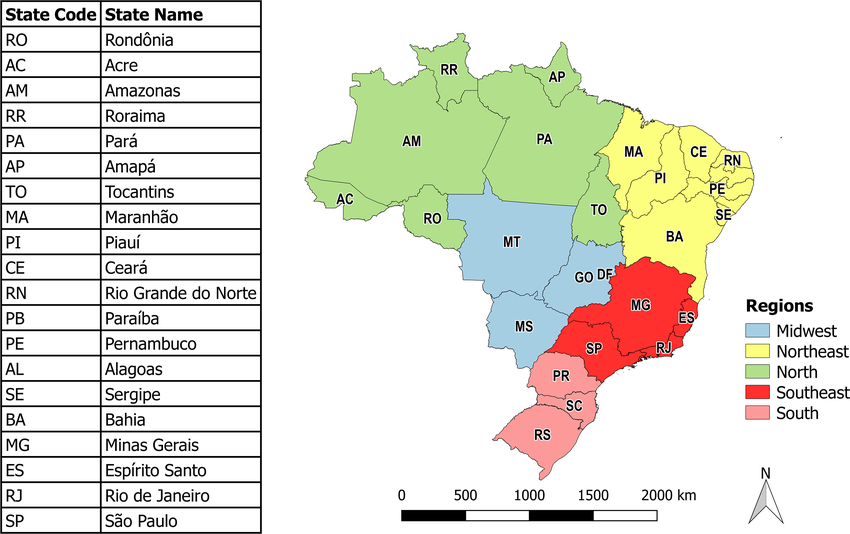

In [119]:
Image(filename=r'state_list.png')

Source: https://www.researchgate.net/figure/Administrative-division-of-Brazil_fig1_349720725

Instituto Brasileiro de Geografia e Estatística (IBGE) membagi negara-negara bagian di brazil kedalam 5 wilayah geografis/region

*Source: www.ibge.gov.br

In [120]:
# Apply the mapping function to create the 'customer_region' column
olist_new2['customer_region'] = olist_new2['customer_state'].apply(map_region)

In [121]:
olist_new2

,customer_unique_id_y,customer_state,order_payment_gap_mnt,delivery_delay_hr,order,active_order,review_score,price,freight_value,payment_sequential,payment_value,payment_type_count,order_qty,product_category_n,product_volume_cm3,product_weight_g,product_name_lenght,product_description_lenght,product_photos_qty,customer_region
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,14.850000,-99.189722,1,0,5.0,129.90,12.00,1.0,141.90,1.0,1.0,1.0,7616.0,1500.0,60.0,236.0,1.0,Southeast
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,434.283333,-101.955000,1,0,4.0,18.90,8.29,1.0,27.19,1.0,1.0,1.0,5148.0,375.0,56.0,635.0,1.0,Southeast
2,0000f46a3911fa3c0805444483337064,SC,0.000000,-33.353611,1,0,3.0,69.00,17.22,1.0,86.22,1.0,1.0,1.0,43750.0,1500.0,49.0,177.0,3.0,South
3,0000f6ccb0745a6a4b88665a16c9f078,PA,19.600000,-266.615278,1,0,4.0,25.99,17.63,1.0,43.62,1.0,1.0,1.0,1045.0,150.0,43.0,1741.0,5.0,North
4,0004aac84e0df4da2b147fca70cf8255,SP,21.166667,-168.851111,1,0,5.0,180.00,16.89,1.0,196.89,1.0,1.0,1.0,528.0,6050.0,58.0,794.0,3.0,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,PE,14.666667,-638.633333,1,0,5.0,785.00,248.71,1.0,2067.42,1.0,2.0,1.0,251625.0,30000.0,54.0,478.5,1.0,Northeast
96092,fffea47cd6d3cc0a88bd621562a9d061,BA,8.400000,-49.527778,1,0,4.0,64.89,19.69,1.0,84.58,1.0,1.0,1.0,32076.0,1720.0,37.0,506.0,2.0,Northeast
96093,ffff371b4d645b6ecea244b27531430a,MT,13.466667,-707.248889,1,0,5.0,89.90,22.56,1.0,112.46,1.0,1.0,1.0,3315.0,600.0,57.0,716.0,5.0,Midwest
96094,ffff5962728ec6157033ef9805bacc48,ES,41.100000,-324.092778,1,0,5.0,115.00,18.69,1.0,133.69,1.0,1.0,1.0,4480.0,444.0,35.0,591.0,3.0,Southeast


In [122]:
olist_new2 = olist_new2.merge(
    customer_seg[['customer_unique_id', 'churn']],
    how='left',
    left_on='customer_unique_id_y',
    right_on='customer_unique_id'
)
olist_new2.isna().sum()

customer_unique_id_y             0
customer_state                   0
order_payment_gap_mnt            0
delivery_delay_hr                0
order                            0
active_order                     0
review_score                     0
price                            0
freight_value                    0
payment_sequential               0
payment_value                    0
payment_type_count               0
order_qty                        0
product_category_n               0
product_volume_cm3               0
product_weight_g                 0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
customer_region                  0
customer_unique_id            4631
churn                         4631
dtype: int64

Because of data cleaning process, here we drop the empty data

In [123]:
olist_new2 = olist_new2.dropna(subset=['customer_unique_id'])
olist_new2 = olist_new2.drop('customer_unique_id_y', axis=1)

In [124]:
olist_new2 = olist_new2.drop('customer_state', axis=1)

In [125]:
olist_new2.isna().sum()

order_payment_gap_mnt         0
delivery_delay_hr             0
order                         0
active_order                  0
review_score                  0
price                         0
freight_value                 0
payment_sequential            0
payment_value                 0
payment_type_count            0
order_qty                     0
product_category_n            0
product_volume_cm3            0
product_weight_g              0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
customer_region               0
customer_unique_id            0
churn                         0
dtype: int64

# **Modeling**

## 1. Data Preprocessing

a. Imbalance Data:
- SMOTE
- RandomUnderSampler
- RandomOverSampler

b. Encoding

c. Transofrmer


In [126]:
# resampling
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

In [127]:
# One-hot Enc : List Kolom
onehot_var = ['customer_region']

# One-hot Enc
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')  #Kemungkinan yang akan di drop adalah midwest oleh scikit learn

In [128]:
# Transformer
transformer = ColumnTransformer([
    ('Onehot', onehot_encoder, onehot_var)],
    remainder='passthrough')

## 2. Train-Test Split

In [129]:
# Separate the features (X) and the target variable (y)
X = olist_new2.drop(columns=['churn','customer_unique_id'])  # Features
y = olist_new2['churn']                # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

## 3. Model Selection

Here we are aiming to find the best model to do prediction.

We will compare performance of several model using cross-validation which will be the basis in determining the best model based on highest-average F2 score and lowest Standard Deviation.

F2 puts more weight in Recall than Precision because beta=2 which is useful when false negative gives more loss than false positive in the context of churn.


In [130]:
#Define the models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors = 5)
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0)

In [131]:
models = [logreg, knn, tree, rf, ada, gbc, xgbc]

all_val = []
mean_val = []
std_val = []

f2_score = make_scorer(fbeta_score, beta=2)

for model in models:
    
    skfold = StratifiedKFold(n_splits=5)
    
    pipe_model = Pipeline([
        ('prep', transformer),
        ('scaler', RobustScaler()),
        ('resampler', smote),
        ('model', model)
    ])
    

    model_cv = cross_val_score(
        pipe_model,
        X_train,
        y_train, 
        cv = skfold,
        scoring = f2_score,
        error_score = 'raise'
    )
    
    all_val.append(model_cv.round(4))
    mean_val.append(model_cv.mean())
    std_val.append(model_cv.std()) 

    print(model, model_cv)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression(random_state=0) [0.59618957 0.58874403 0.58442403 0.58968697 0.58884074]
KNeighborsClassifier() [0.67766034 0.66658862 0.66875998 0.66758914 0.67055642]
DecisionTreeClassifier(random_state=0) [0.74074848 0.74392543 0.72443838 0.74320926 0.74145402]
RandomForestClassifier(random_state=0) [0.85159597 0.84959216 0.84124803 0.84991274 0.84797422]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=0),
                   random_state=0) [0.7424388  0.73871853 0.72739669 0.73957109 0.74037254]
GradientBoostingClassifier(random_state=0) [0.7413552  0.74281834 0.73910956 0.73697639 0.74564605]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, rando

In [132]:
pd.DataFrame({
    'model': models,
    'mean': mean_val,
    'std': std_val
})

,model,mean,std
0,LogisticRegression(random_state=0),0.589577,0.003782
1,KNeighborsClassifier(),0.670231,0.003942
2,DecisionTreeClassifier(random_state=0),0.738755,0.007250
3,RandomForestClassifier(random_state=0),0.848065,0.003597
4,AdaBoostClassifier(estimator=DecisionTreeClass...,0.737700,0.005297
5,GradientBoostingClassifier(random_state=0),0.741181,0.002987
6,"XGBClassifier(base_score=None, booster=None, c...",0.850225,0.002416


Model XGBClassifier and RandomForest are chosen to be the two most optimum model with the highest average and low standard deviation. Subsequently, those 2 models will be used to do hyperparameter tuning. 

## 4. Test Set Prediction - Before Hyperparameter

In [133]:
models = {
    'XGBC': XGBClassifier(random_state=0, verbosity=0),
    'RandomForest': RandomForestClassifier(random_state=0)
}

score = []
y_predict = []

for i in models:
    model = Pipeline([
        ('transofrmer', transformer), 
        ('balancing', smote),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    score.append([fbeta_score(y_test, y_pred, beta=2)])
    y_predict.append(y_pred)

score_before_tuning = pd.DataFrame(score, columns=['F2 score'], index=models.keys())
score_before_tuning

,F2 score
XGBC,0.874917
RandomForest,0.877531


The test set prediction above compares XGBC and RF before hyperparameter tuning. The F2 score difference between these two models is in precision of 0.001

## 5. Hyperparameter Tuning

### a. XGB Classifier

In [134]:
max_depth = list(np.arange(1,10))

learning_rate = list(np.arange(1,100)/100)

n_estimators = list(np.arange(50,500))

subsample = list(np.arange(2,10)/10)

max_features = list(np.arange(1,10))

# Hyperparameter space XGBC / Kumpulan hyperparameter yang akan dicoba dalam tuning
hyperparam_space_xgbc = {
    'balancing':[smote, rus, ros, None],
    'model__max_depth':max_depth ,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

In [135]:
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Benchmark model 1
xgbc = XGBClassifier(random_state=0, verbosity=0)

# Create the algorithm chains / Pipeline yang mencakup transformasi data (mengonversi variabel kategorikal, normalisasi), data balancing, dan model
estimator_xgbc = Pipeline([
    ('transformer', transformer),
    ('scaler', RobustScaler()),
    ('balancing', smote),
    ('model', xgbc)
    ])

# Hyperparameter tuning / RandomizedSearchCV untuk mencoba 30 kombinasi dari hyperparameter di hyperparam_space_gbc.
random_xgbc = RandomizedSearchCV(
    estimator_xgbc,
    param_distributions = hyperparam_space_xgbc,
    cv = skf,
    scoring = f2_score,
    n_jobs = -1,
    random_state=0,
    n_iter=30
)

In [136]:
random_xgbc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['customer_region'])])),
                                             ('scaler', RobustScaler()),
                                             ('balancing',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              XGBClassifier(...
                                                                 0.27, 0.28,
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'model__max_features': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [137]:
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,3.297617,0.091997,0.163818,0.020296,0.5,270,2,8,0.01,None,"{'model__subsample': 0.5, 'model__n_estimators...",0.904650,0.903770,0.902450,0.907075,0.907868,0.905163,0.002027,1
7,2.587612,0.021666,0.150486,0.011625,0.7,342,7,7,0.11,None,"{'model__subsample': 0.7, 'model__n_estimators...",0.897185,0.892854,0.891538,0.893623,0.895620,0.894164,0.002008,2
14,1.020719,0.096916,0.080525,0.028679,0.6,55,4,7,0.37,None,"{'model__subsample': 0.6, 'model__n_estimators...",0.876343,0.874771,0.875872,0.875841,0.879966,0.876559,0.001780,3
26,0.626269,0.043775,0.028788,0.005875,0.6,106,7,3,0.45,None,"{'model__subsample': 0.6, 'model__n_estimators...",0.872083,0.870769,0.871677,0.877114,0.873540,0.873036,0.002226,4
10,2.155323,0.068194,0.114991,0.021816,0.9,180,7,8,0.42,RandomOverSampler(random_state=0),"{'model__subsample': 0.9, 'model__n_estimators...",0.865371,0.865106,0.866098,0.864121,0.867595,0.865658,0.001157,5


In [138]:
print('XGBC')
print('Best_score:', random_xgbc.best_score_)
print('Best_params:', random_xgbc.best_params_)

XGBC
Best_score: 0.9051627409516948
Best_params: {'model__subsample': 0.5, 'model__n_estimators': 270, 'model__max_features': 2, 'model__max_depth': 8, 'model__learning_rate': 0.01, 'balancing': None}


### b. Random Forest

In [139]:
max_depth = list(np.arange(1,11))
n_estimators = list(np.arange(100, 201))
max_features = list(np.arange(0.1, 1.0, 0.1))

hyperparam_space_rf = {
    'balancing': [smote, rus, ros, None],
    'model__max_depth': max_depth,
    'model__n_estimators': n_estimators, 
    'model__max_features': max_features
}

In [140]:
rf = RandomForestClassifier(random_state=0)

estimator_rf =  Pipeline([
    ('transformer', transformer), 
    ('scaler', RobustScaler()),
    ('balancing', smote),
    ('model', rf)
])

random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions=hyperparam_space_rf, 
    cv= skf,
    scoring=f2_score,
    n_jobs=-1,
    random_state=0,
    n_iter=30
)

In [141]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['customer_region'])])),
                                             ('scaler', RobustScaler()),
                                             ('balancing',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              RandomForestCl...
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'model__max_features': [0.1, 0.2,
                                                                0.30000000000000004,
                                                                0.4, 0.5,
                                                                0.6000000000000001,
                                                                0.7000000000000001,
                                                                0.8, 0.9],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [142]:
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,6.569212,0.134171,0.106805,0.009679,105,0.2,6,None,"{'model__n_estimators': 105, 'model__max_featu...",0.909314,0.909108,0.907435,0.908387,0.908242,0.908497,0.000670,1
12,13.280869,0.463088,0.186722,0.027447,112,0.3,10,None,"{'model__n_estimators': 112, 'model__max_featu...",0.908467,0.908898,0.903389,0.909020,0.909442,0.907843,0.002249,2
3,14.022464,0.324807,0.144025,0.012122,186,0.3,6,None,"{'model__n_estimators': 186, 'model__max_featu...",0.908136,0.905967,0.906390,0.909237,0.908051,0.907556,0.001208,3
14,3.225340,0.281569,0.063814,0.012566,198,0.2,1,None,"{'model__n_estimators': 198, 'model__max_featu...",0.907517,0.907517,0.907534,0.907508,0.907508,0.907517,0.000009,4
2,8.630538,0.211217,0.069452,0.006451,102,0.5,4,None,"{'model__n_estimators': 102, 'model__max_featu...",0.905147,0.905631,0.904582,0.904957,0.906464,0.905356,0.000649,5


In [143]:
print("Random Forest")
print("Best score:", random_rf.best_score_)
print("Best params:", random_rf.best_params_)

Random Forest
Best score: 0.9084972947363292
Best params: {'model__n_estimators': 105, 'model__max_features': 0.2, 'model__max_depth': 6, 'balancing': None}


The next step was hyperparameter tuning for both XGBC and RF. The best F2 score for XGBC and RF was 0.9051 and 0.9084, respectively. This shows an incredibly small difference between the two models.

## 6. Test Set Prediction - After Hyperparameter

In [144]:
xgbc_tuning = random_xgbc.best_estimator_

xgbc_tuning.fit(X_train, y_train)

y_pred_xgbc_tuning = xgbc_tuning.predict(X_test)

In [145]:
f2score_xgbc_tuning = fbeta_score(y_test, y_pred_xgbc_tuning, beta=2)
f2score_xgbc_tuning

0.9069857797808688

In [146]:
rf_tuning = random_rf.best_estimator_

rf_tuning.fit(X_train, y_train)

y_pred_rf_tuning = rf_tuning.predict(X_test)

In [147]:
f2score_rf_tuning = fbeta_score(y_test, y_pred_rf_tuning, beta=2)
f2score_rf_tuning

0.9079147297317627

In [148]:
score_list = [f2score_xgbc_tuning, f2score_rf_tuning]

models = ['XGBC', 'RandomForest']

score_after_tuning = pd.DataFrame({
    'Model': models,
    'F2 score': score_list
})

score_after_tuning

,Model,F2 score
0,XGBC,0.906986
1,RandomForest,0.907915


## 7. Comparison (Test Set)

In [149]:
score_before_tuning

,F2 score
XGBC,0.874917
RandomForest,0.877531


In [150]:
score_after_tuning

,Model,F2 score
0,XGBC,0.906986
1,RandomForest,0.907915


### a. Result from XGBC

In [151]:
print('Result from XGBC')
print('Precision:', precision_score(y_test, y_pred_xgbc_tuning))
print('Recall:', recall_score(y_test, y_pred_xgbc_tuning))
print('F1 score', f1_score(y_test, y_pred_xgbc_tuning))

Result from XGBC
Precision: 0.7468168148953868
Recall: 0.9583709664176041
F1 score 0.8394706559263522


In [152]:
print('XGBC')
print(classification_report(y_test, y_pred_xgbc_tuning))

XGBC
              precision    recall  f1-score   support

         0.0       0.81      0.35      0.49      6114
         1.0       0.75      0.96      0.84     12179

    accuracy                           0.76     18293
   macro avg       0.78      0.66      0.67     18293
weighted avg       0.77      0.76      0.72     18293



Text(0.5, 1.0, 'XGBC After Tuning')

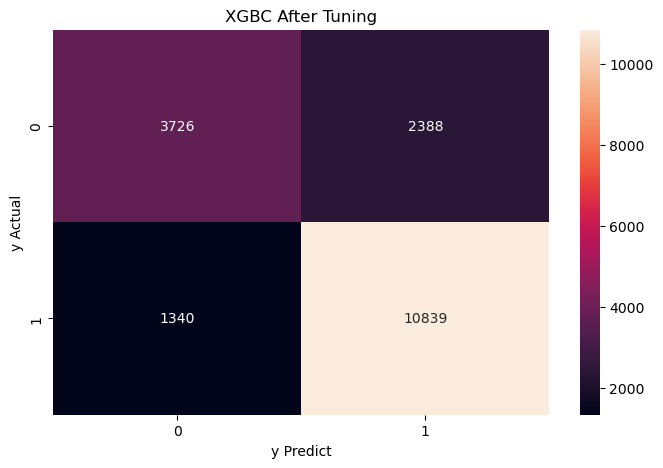

In [153]:
# XGBC after tuning

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predict[0]), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predict')
plt.ylabel('y Actual')
plt.title('XGBC After Tuning')

### b. Result from RF

In [160]:
print('Result from Random Forest')
print('Precision:', precision_score(y_test, y_pred_rf_tuning))
print('Recall:', recall_score(y_test, y_pred_rf_tuning))
print('F1 score', f1_score(y_test, y_pred_rf_tuning))

Result from Random Forest
Precision: 0.6798085046465784
Recall: 0.9910501683225224
F1 score 0.8064408365069821


In [161]:
print('Random Forest')
print(classification_report(y_test, y_pred_rf_tuning))

Random Forest
              precision    recall  f1-score   support

         0.0       0.80      0.07      0.13      6114
         1.0       0.68      0.99      0.81     12179

    accuracy                           0.68     18293
   macro avg       0.74      0.53      0.47     18293
weighted avg       0.72      0.68      0.58     18293



Text(0.5, 1.0, 'RF After Tuning')

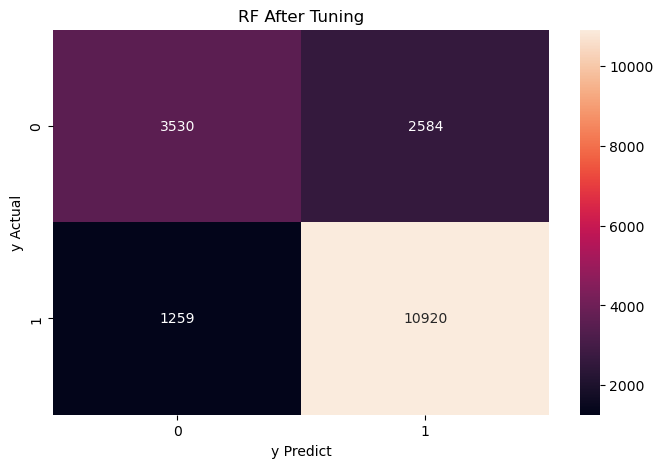

In [162]:
# RG after tuning

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_predict[1]), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predict')
plt.ylabel('y Actual')
plt.title('RF After Tuning')

The incredibly small difference in F2 score between XGBC and RF after hyperparameter tuning implies:

1. **Identical Performance** – Both models perform nearly identically in terms of the F2 score, meaning neither has a significant advantage over the other.
2. **No Strong Preference** – Since the difference is minimal, choosing one over the other should be based on other factors like training time, interpretability, or computational efficiency rather than just performance.
3. **Diminishing Returns from Tuning** – The improvement from hyperparameter tuning may not have significantly differentiated the models, suggesting they were already well-optimized or that their architectures inherently perform similarly on this dataset.
4. **Consider Other Metrics** – If the F2 score alone does not provide a clear choice, metrics like precision and recall are necessary to support he choice of the model

## 8. Metric

This section explores various metrics, and from this analysis, the best model will be selected.

**1. Precision**

Precision measures the model's accuracy in predicting true positives out of all positive predictions. It is particularly useful when the cost of False Positives (FP) is high, as it helps minimize FP. In this case study, FP refers to customers predicted to churn by the model but who, in reality, do not churn. In other words, among all the customers classified as churn, how many actually churned?

**XGBC**:
Precision: 74.6%
Out of 13227 customers classified as churn, 74% (10839 customers) are correctly predicted, while 2388 customers are incorrectly predicted as churn.

**Random Forest (RF)**:
Precision: 67.9%
Out of 13504 customers classified as churn, 10920 are correctly predicted, and 2584 are incorrectly predicted as churn.

**2. Recall**

Recall measures the model's ability to correctly predict true positives out of all actual positive observations. It is suitable when the cost of False Negatives (FN) is high, as it helps minimize FN.

**XGBC**:
Recall: 95.8%
Out of 12179 customers who actually churned, 10839 customers are correctly predicted, while 1340 are mistakenly predicted as not churn.

**Random Forest (RF)**:
Recall: 99.9%
Out of 12179 customers who actually churned, 10920 are correctly predicted, while 1259 are mistakenly predicted as not churn.

## 9. Choosing the Best Model for Olist's Customer Retention Strategy

Based on Olist's business context, problem statement, and goals, the focus of the model machine learning is effort is customer retention. Given that acquiring new customers is five times more expensive than retaining existing ones, minimizing False Negatives (FN) is the top priority.

**False Positives (FP)**: Customers predicted to churn but who actually remain.
Consequence: Olist may spend unnecessary resources on retention efforts for these customers.
Cost: Marketing spend is wasted on interventions that were not needed.

**False Negatives (FN)**: Customers predicted to stay but who actually churn.
Consequence: These customers leave without receiving any retention effort.
Cost: Direct revenue loss due to churn, plus additional costs to acquire new customers to replace them.

Since churn leads to significant revenue loss and replacing lost customers is costly, reducing FN is more critical than reducing FP. Even if some unnecessary interventions are made due to FP, the cost of losing a churned customer is far greater than the cost of a wrongly targeted retention effort.

Random Forest has a higher recall (99.9%) than XGBoost (95.8%), meaning it catches more of the actual churned customers (10,920 vs. 10,839).
Random Forest has a slightly lower precision (67.9%), meaning it has more false positives (2,584 vs. 2,388) than XGBoost.

Here are the reasons that support Random Forest as the better choice despite its slightly lower precision:
**1. Maximizing Retention Efforts**:
RF identifies 99.9% of churned customers, ensuring Olist can proactively intervene.
Missing 1259 customers is better than missing 1340 (XGBoost).

**2. Minimizing Revenue Loss from Churn**:
Each lost customer represents lost revenue and high replacement costs.
Retaining even a fraction of these customers through intervention is cost-effective.

**3. Balancing Cost vs. Effectiveness**:
While RF has more False Positives, the cost of unnecessary intervention is less damaging than losing actual churned customers.
A well-optimized marketing campaign can mitigate this effect by targeting interventions based on additional filters (e.g., high-value customers).

4. **Long-Term Profitability**:
By reducing churn, Olist boosts customer lifetime value (LTV) and lowers marketing acquisition costs, strengthening its position in Brazil’s competitive e-commerce market.

## 10. Model's impacts

**Without the model**:
- Retention efforts are reactive, meaning customers churn before interventions occur.
- Marketing campaigns target all customers equally, leading to inefficient spending.
- Retention strategies are generic, offering the same promotions to all customers regardless of risk level.
- Customer churn remains high, requiring continuous investment in acquiring new customers, which is more expensive than retaining existing ones.

**With the model**:
- Retention becomes proactive, identifying at-risk customers before they leave.
- Marketing spend is optimized, focusing on customers with a high likelihood of churning, reducing unnecessary costs.
- Personalized engagement strategies improve loyalty, offering tailored promotions and support.
- Lower churn leads to higher profitability, as satisfied customers return, refer new buyers, and attract more sellers to the platform.

## 11. Feature Importance

,Feature,Importance
10,remainder__freight_value,0.242952
5,remainder__delivery_delay_hr,0.137178
17,remainder__product_weight_g,0.116901
9,remainder__price,0.099838
16,remainder__product_volume_cm3,0.089801
4,remainder__order_payment_gap_mnt,0.071114
19,remainder__product_description_lenght,0.059178
12,remainder__payment_value,0.051131
18,remainder__product_name_lenght,0.036770
20,remainder__product_photos_qty,0.028312


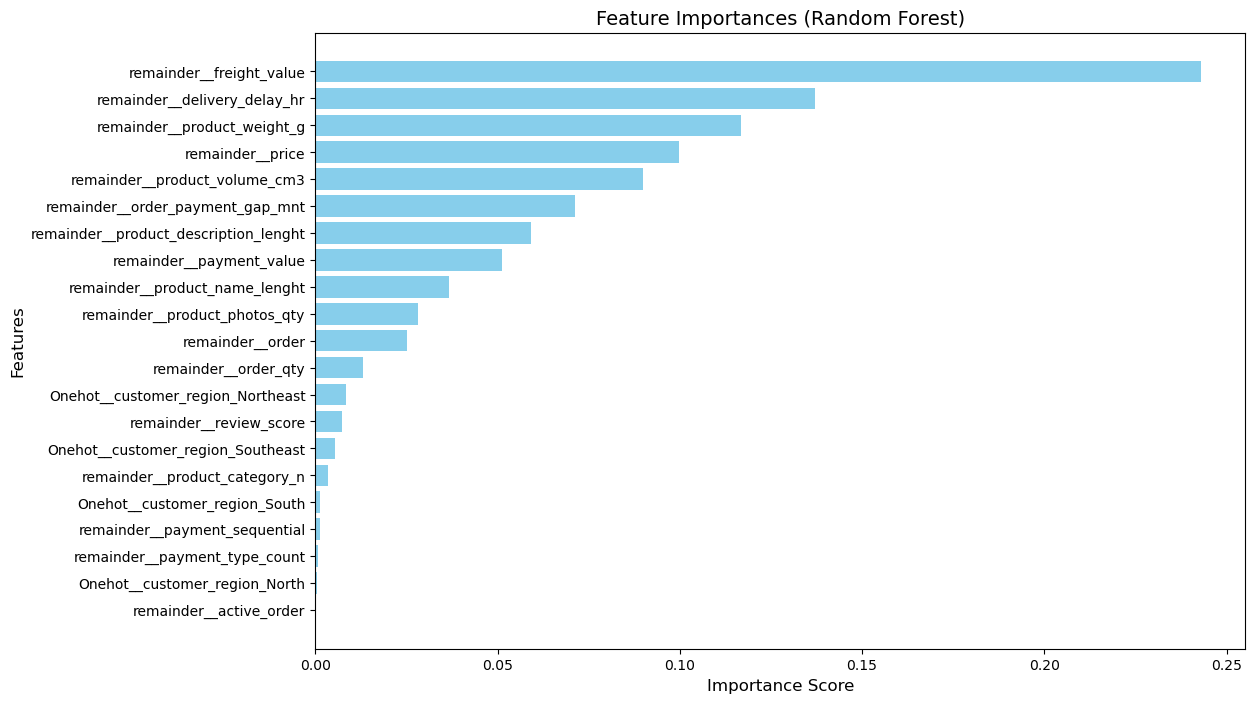

In [157]:
# Adjusting to use column names from X since preprocessing is not part of the pipeline
feature_names = transformer.get_feature_names_out()

# Model terbaik setelah tuning
best_rf = random_rf.best_estimator_
new_feature_names = [name.replace('num__', '').replace('ord__', '').replace('cat1__', '').replace('cat2__', '') for name in feature_names]

# Extracting feature importances from the model
importances = best_rf.named_steps['model'].feature_importances_

# Creating a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances as a DataFrame for reference
display(feature_importances)

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importances (Random Forest)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()
plt.show()


## 12. Model Limitation:
While the churn prediction model significantly improves customer retention strategies, it has certain limitations that should be considered:

1. Data Dependency – The model’s accuracy relies heavily on the quality and quantity of historical transaction data. Incomplete, outdated, or biased data can lead to incorrect predictions.

2. Static Predictions – The model predicts churn based on past data but does not dynamically adapt to sudden market changes (e.g., economic shifts, competitor actions, or viral trends).

3. Customer Behavior Complexity – Not all churn is predictable through transaction data alone. External factors like customer emotions, brand perception, or personal financial situations are not captured by the model.

4. Retention Strategy Implementation – Predicting churn is only one step; success depends on Olist’s ability to act on predictions effectively. Poorly executed retention campaigns can still result in high churn.

5. Computational Costs – Running and maintaining a machine learning model requires technical expertise, infrastructure, and continuous monitoring, which could be a challenge for smaller businesses.

**Mitigation Strategies**: 
1. Regularly update and retrain the model with new data.
2. Use explainability techniques (e.g., SHAP values) to improve trust in predictions.
3. Combine the model with qualitative insights, like customer feedback, for better decision-making.
4. Continuously test and refine retention strategies based on model insights.

# **Conclusion & Recommendation**

## 1. Conclusion
The Random Forest model has been identified as the most effective machine learning approach for predicting customer churn, demonstrating high accuracy and recall in detecting at-risk customers. By developing this model, Olist can shift from a reactive to a proactive customer retention strategy, ensuring that valuable customers remain engaged and continue purchasing on the platform.

Retaining customers is not only cost-efficient but also crucial for long-term growth. Studies show that acquiring a new customer costs five times more than retaining an existing one, while improving retention by just 5% can increase profits by up to 95%. Moreover, satisfied returning customers contribute to word-of-mouth marketing, one of the most powerful and trusted growth drivers. This organic promotion attracts new buyers and sellers, expanding Olist’s marketplace presence without additional acquisition costs.

Beyond immediate retention, using the churn prediction model as a long-term strategy will allow Olist to continuously refine its marketing efforts, allocate resources efficiently, and make data-driven decisions that maximize customer lifetime value (LTV). The model provides real-time insights into customer behavior, allowing Olist to detect changing trends early and adapt accordingly, ensuring sustained growth and competitive advantage in Brazil’s e-commerce market.

## 2. Recommendation
To effectively reduce churn and strengthen customer loyalty, Olist should implement the following strategic interventions:

**Enhance Customer Experience & Support**:
- Optimize customer service with AI-powered chatbots, live chat, and fast-response customer support to resolve issues quickly.
- Offer hassle-free return policies and ensure smooth post-purchase experiences.

**Implement Loyalty & Reward Programs**:
- Introduce exclusive discounts, cashback, or points-based rewards to encourage repeat purchases.
- Provide tiered benefits for long-term customers to reinforce brand loyalty.

**Offer Personalized Promotions & Engagements**:
- Utilize customer data to create tailored offers based on past purchases and preferences.
- Send special occasion discounts (e.g., birthdays, anniversaries, holidays) to foster emotional connections with customers.

**Leverage Customer Feedback & Insights**:
- Actively monitor customer reviews and take corrective actions to improve service quality.
- Conduct exit surveys to understand why customers leave and use these insights for continuous improvement.

**Encourage Word-of-Mouth Marketing & Seller Growth**:
- Launch a referral program to incentivize satisfied customers to recommend Olist to friends and family.
- Engage with brand advocates and influencers to amplify organic reach and credibility.
- Strengthen partnerships with existing sellers to ensure they also benefit from increased buyer retention.

# **Save Model**

In [158]:
with open('Model_RF.sav', 'wb') as file:
    pickle.dump(rf_tuning, file)

In [159]:
filename = 'Model_RF.sav'
pickle.load(open(filename, 'rb'))

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['customer_region'])])),
                ('scaler', RobustScaler()), ('balancing', None),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=0.2,
                                        n_estimators=105, random_state=0))])